<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_009_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Load & Preprocess Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column,
                             process_marriage_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            df = process_marriage_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    # check_categorical_order(df, categorical_columns + pay_cols)
else:
    print("Error loading and preprocessing data.")


Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

### Distributions Visualization - Categorical Data

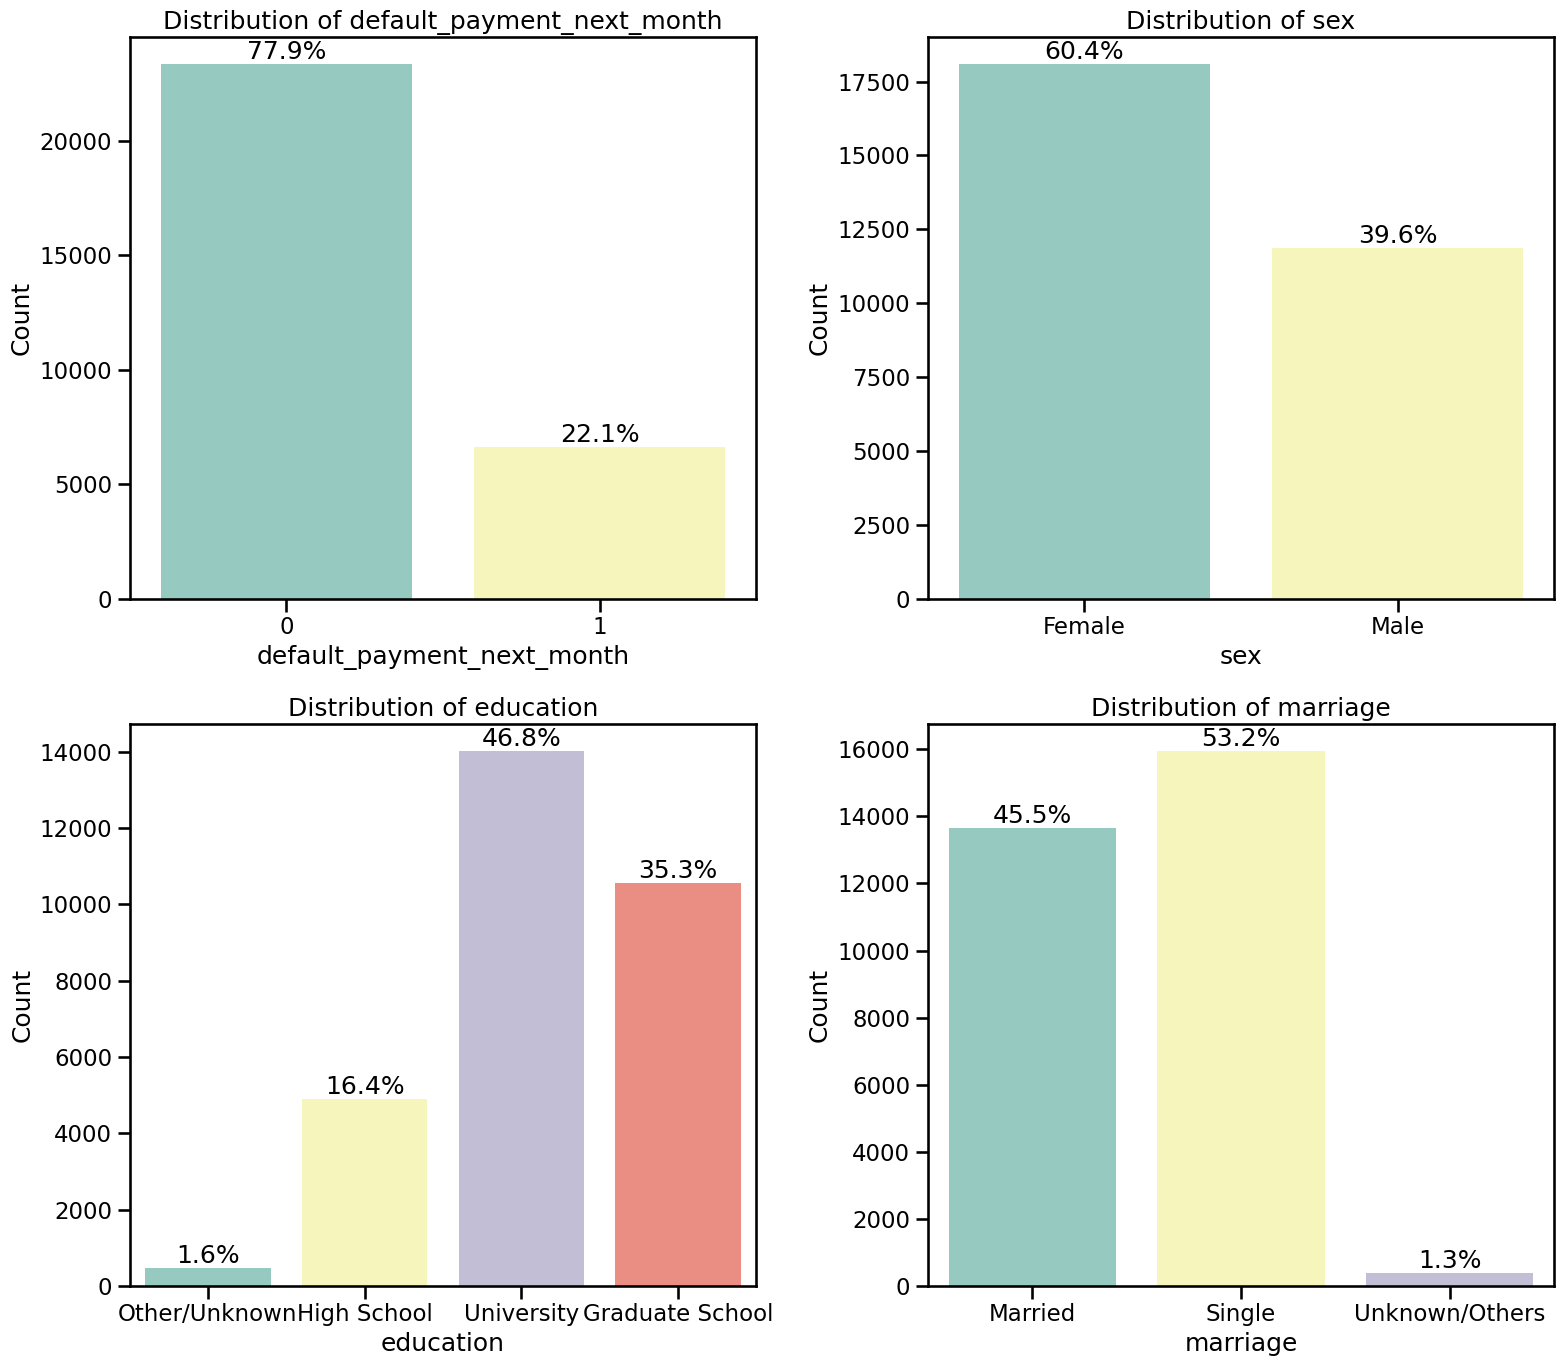

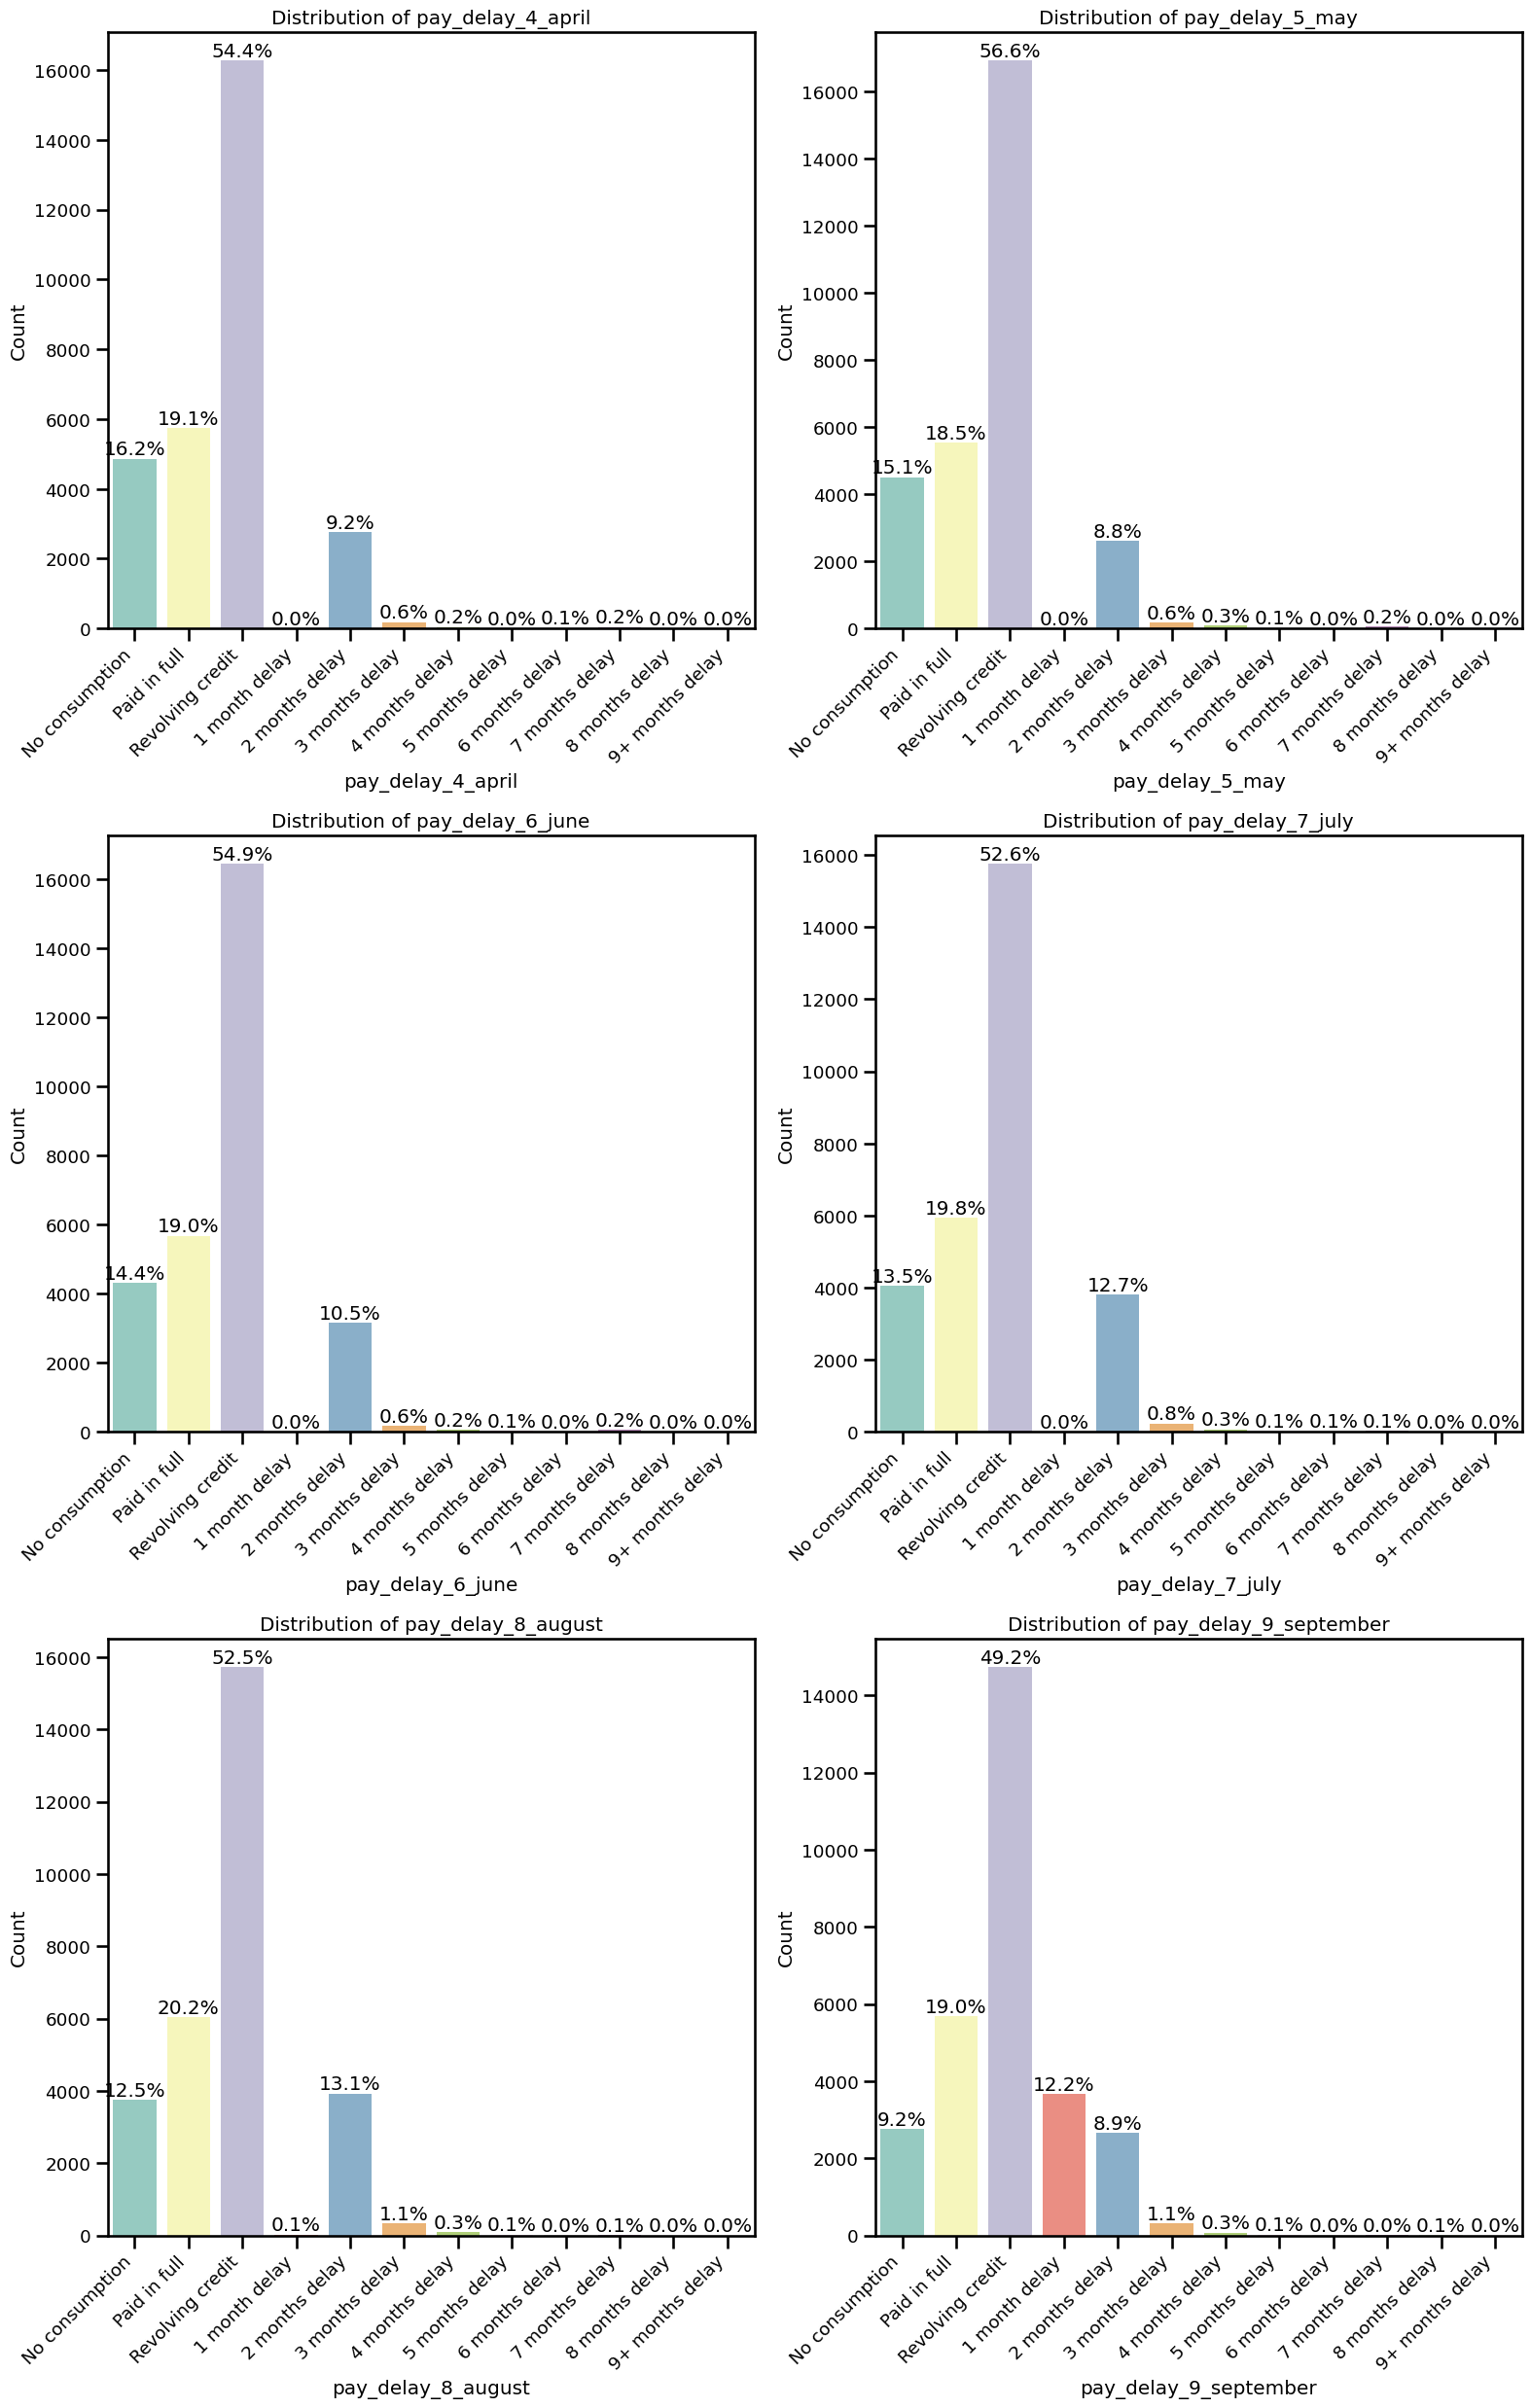

In [8]:
from categorical_data_utils import (categorical_columns, ordinal_columns,
        plot_categorical_distributions, plot_ordinal_distributions)

# Run the plotting functions
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Pipeline Processing Limitations and Adjustments for Categorical Data Types

#### Pipeline Processing Limitations:
When using `OneHotEncoder` with `handle_unknown='ignore'`, any unknown categories in the `sex` or `marriage` columns would be encoded as all zeros. This could inadvertently cause the model to interpret unknown values as "female" for `sex` and "married" for `marriage`, potentially leading to misclassification.

#### Category Code Adjustment:
To avoid this, we adjusted the category codes for `sex` and `marriage` to start from `1`, reserving `0` for unknown categories:
- **`sex`**: Male is encoded as `1`, Female as `2`, with unknowns as `0`.
- **`marriage`**: Single is `1`, Married `2`, and Others `3`, with unknowns as `0`.

This adjustment ensures that unknown categories are clearly distinguished from valid categories, improving the robustness of the model.

For ordinal columns where order matters (e.g., education levels), we handle unknowns by assigning them a category of `-1`. This approach maintains clarity and prevents misinterpretation during model training.

In [7]:
print('Current Cat Codes for Sex:', df['sex'].cat.codes.unique())
print('Current Cat Codes for Marriage:', df['marriage'].cat.codes.unique())

# Adjust category codes manually by adding 1 to the existing codes
df['sex'] = df['sex'].cat.codes + 1
df['marriage'] = df['marriage'].cat.codes + 1

# Recast the adjusted columns back to 'category' dtype with 0 for unknowns
df['sex'] = pd.Categorical(df['sex'], categories=[0, 1, 2], ordered=False)
df['marriage'] = pd.Categorical(df['marriage'], categories=[0, 1, 2, 3], ordered=False)

# Confirm the unique category codes
print('Cat Codes after Recoding - Sex:', df['sex'].cat.codes.unique())  # Output: [1 2]
print('Cat Codes after Recoding - Marriage:', df['marriage'].cat.codes.unique())  # Output: [1 2 3]

Current Cat Codes for Sex: [0 1]
Current Cat Codes for Marriage: [0 1 2]
Cat Codes after Recoding - Sex: [1 2]
Cat Codes after Recoding - Marriage: [1 2 3]


### Oultier Removal

**Numeric Columns WinsorRobustOutlierRemovalTransformer**

### Why This Approach Works:

1. **Winsorization:**
   - **Capping Outliers:** Winsorization caps the extreme values in your data, which can be particularly effective in reducing the influence of outliers without removing rows. This is helpful when you want to retain as much data as possible while still addressing the issue of extreme values that could skew your model's performance.
   - **Preserving Data Integrity:** By capping rather than removing outliers, you avoid the potential loss of important data points that might carry meaningful information, especially in cases where those outliers are not errors but legitimate observations.

2. **Robust Scaling:**
   - **Reducing Skewness:** RobustScaler scales the data based on the interquartile range (IQR), which is less sensitive to outliers compared to standard scaling methods like `StandardScaler`. This further helps in reducing skewness in the data.
   - **Handling Non-Normal Distributions:** RobustScaler is particularly useful when your data is not normally distributed, as it centers the data and scales it to focus on the median and IQR, making it more robust to deviations caused by outliers.

### When to Use This Approach:

- **When Your Data Contains Genuine Outliers:** If the outliers are not errors but legitimate data points (e.g., very high credit card balances that are uncommon but possible), this method is appropriate because it preserves these points while reducing their impact.
- **When You Want to Retain as Much Data as Possible:** Since no rows are removed, this method ensures that your dataset remains intact, which can be crucial when working with smaller datasets.
- **When You Need to Reduce Skewness:** This method effectively reduces skewness by capping extremes and scaling the data robustly, leading to a more balanced dataset for modeling.

### Benefits:

- **Improved Model Performance:** By reducing skewness and the impact of extreme outliers, your models might perform better, particularly linear models like Logistic Regression, which can be sensitive to such issues.
- **Data Integrity:** Retaining all rows ensures that you aren't losing potentially valuable information that could help your model make more accurate predictions.

### Viability in Practice:
This method is commonly used in practice when dealing with skewed data and outliers, especially in financial datasets where outliers can represent significant but valid transactions. It's a balanced approach that mitigates the influence of extreme values while preserving the overall structure and size of the dataset.

### Next Steps:
- **Evaluate Model Performance:** Continue with this approach and evaluate how your model performs with the transformed data. Look at metrics like accuracy, precision, recall, and F1-score to determine if this preprocessing improves your model.
- **Cross-Validation:** You might also want to validate this approach by running cross-validation to see if the model's performance is consistent across different subsets of your data.

If you're seeing positive results with reduced skewness and better model performance, this approach is definitely viable and can be considered a good practice for your use case.

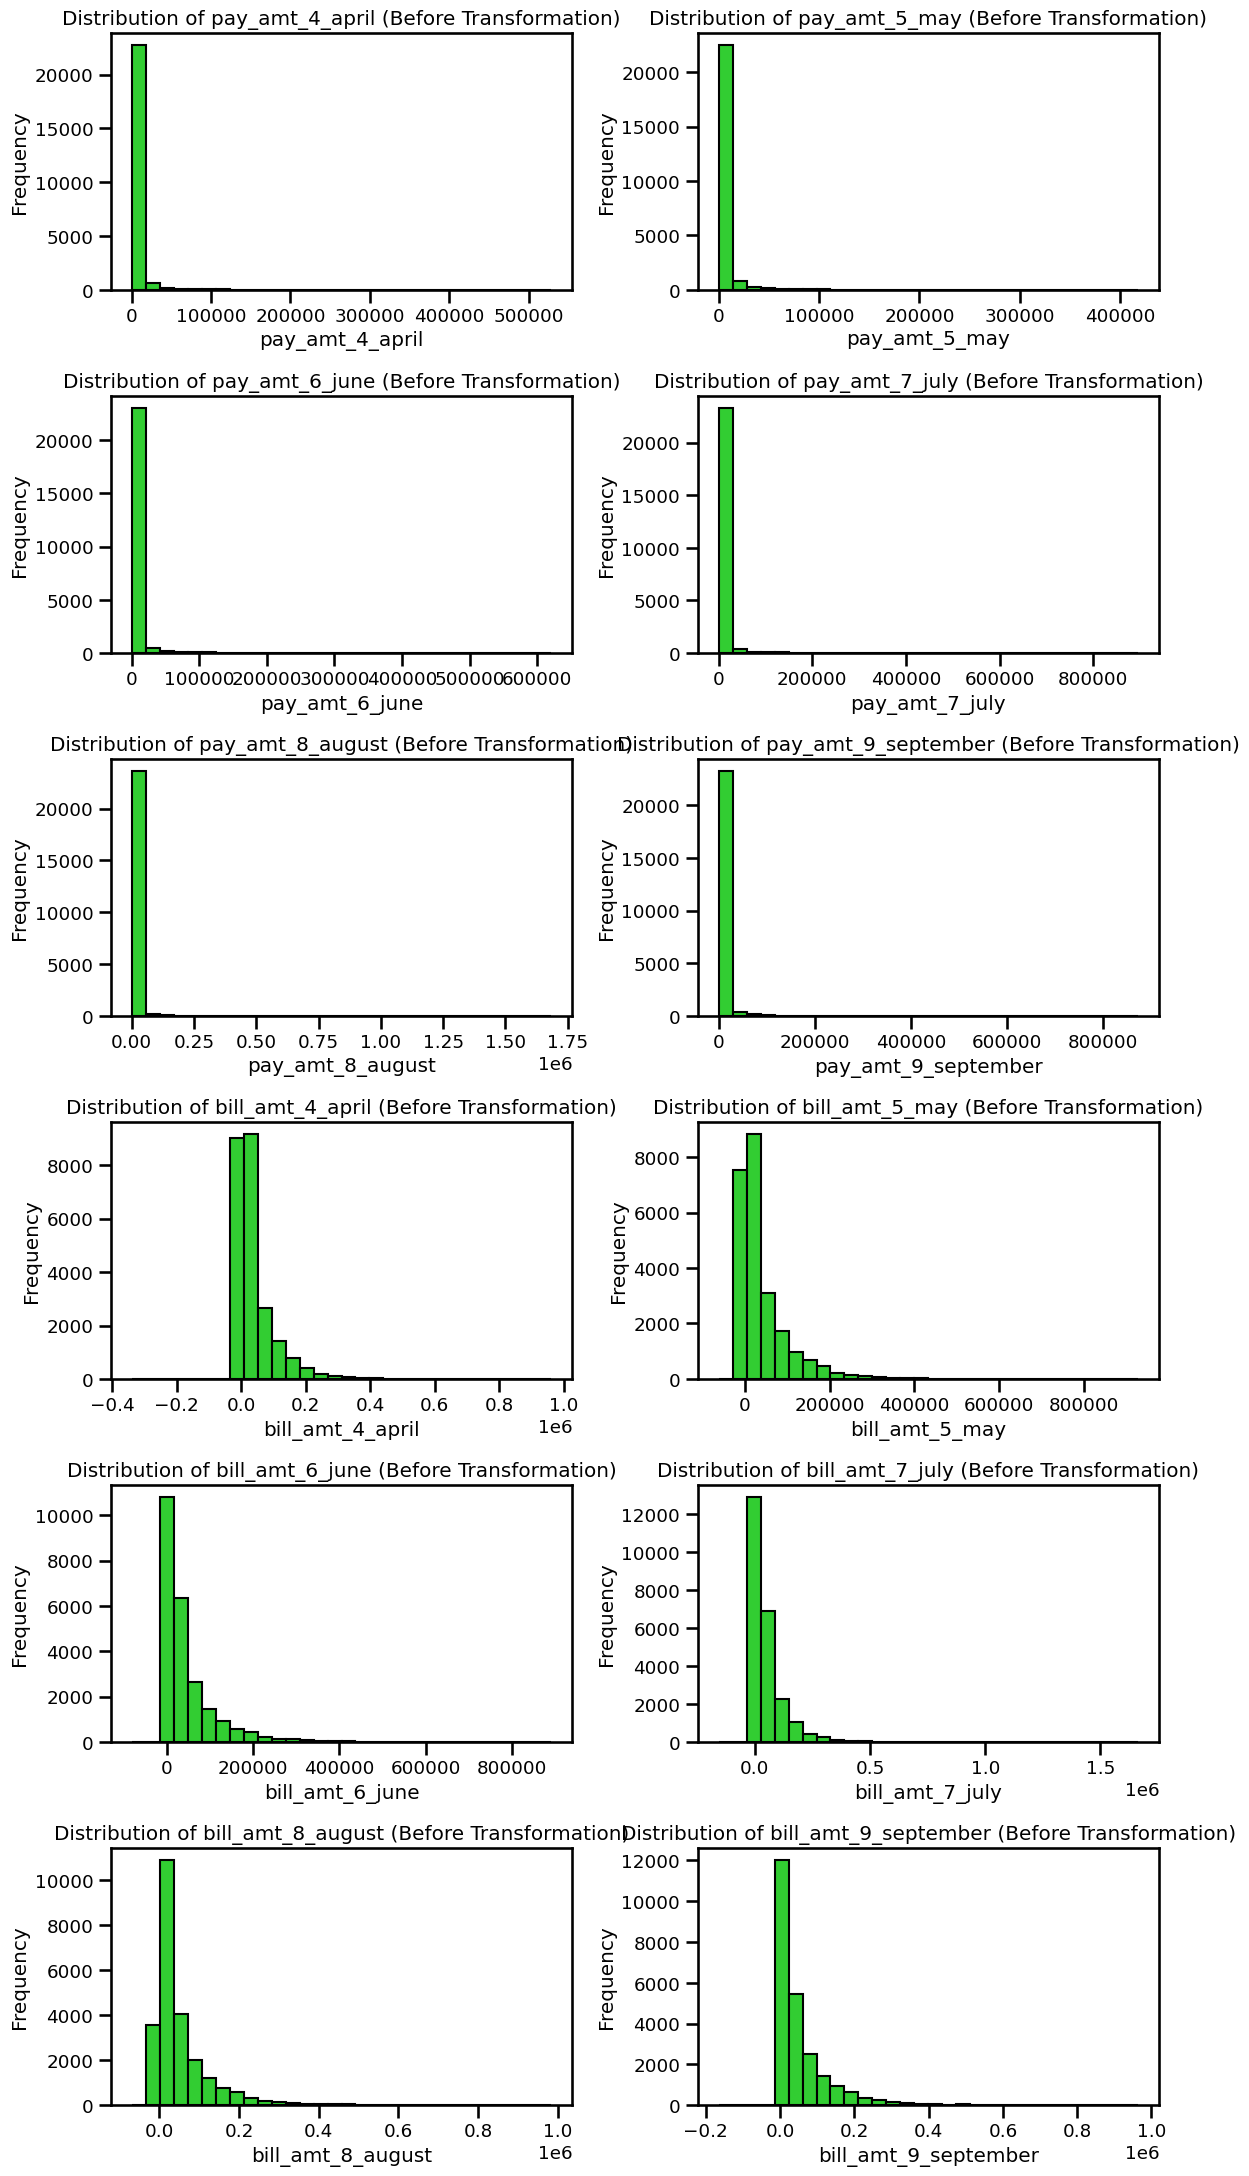

Baseline Skewness:
pay_amt_4_april         10.697865
pay_amt_5_may           10.854087
pay_amt_6_june          11.740485
pay_amt_7_july          18.539164
pay_amt_8_august        31.992701
pay_amt_9_september     15.618873
bill_amt_4_april         2.872336
bill_amt_5_may           2.891269
bill_amt_6_june          2.855295
bill_amt_7_july          3.182606
bill_amt_8_august        2.690984
bill_amt_9_september     2.635587
dtype: float64


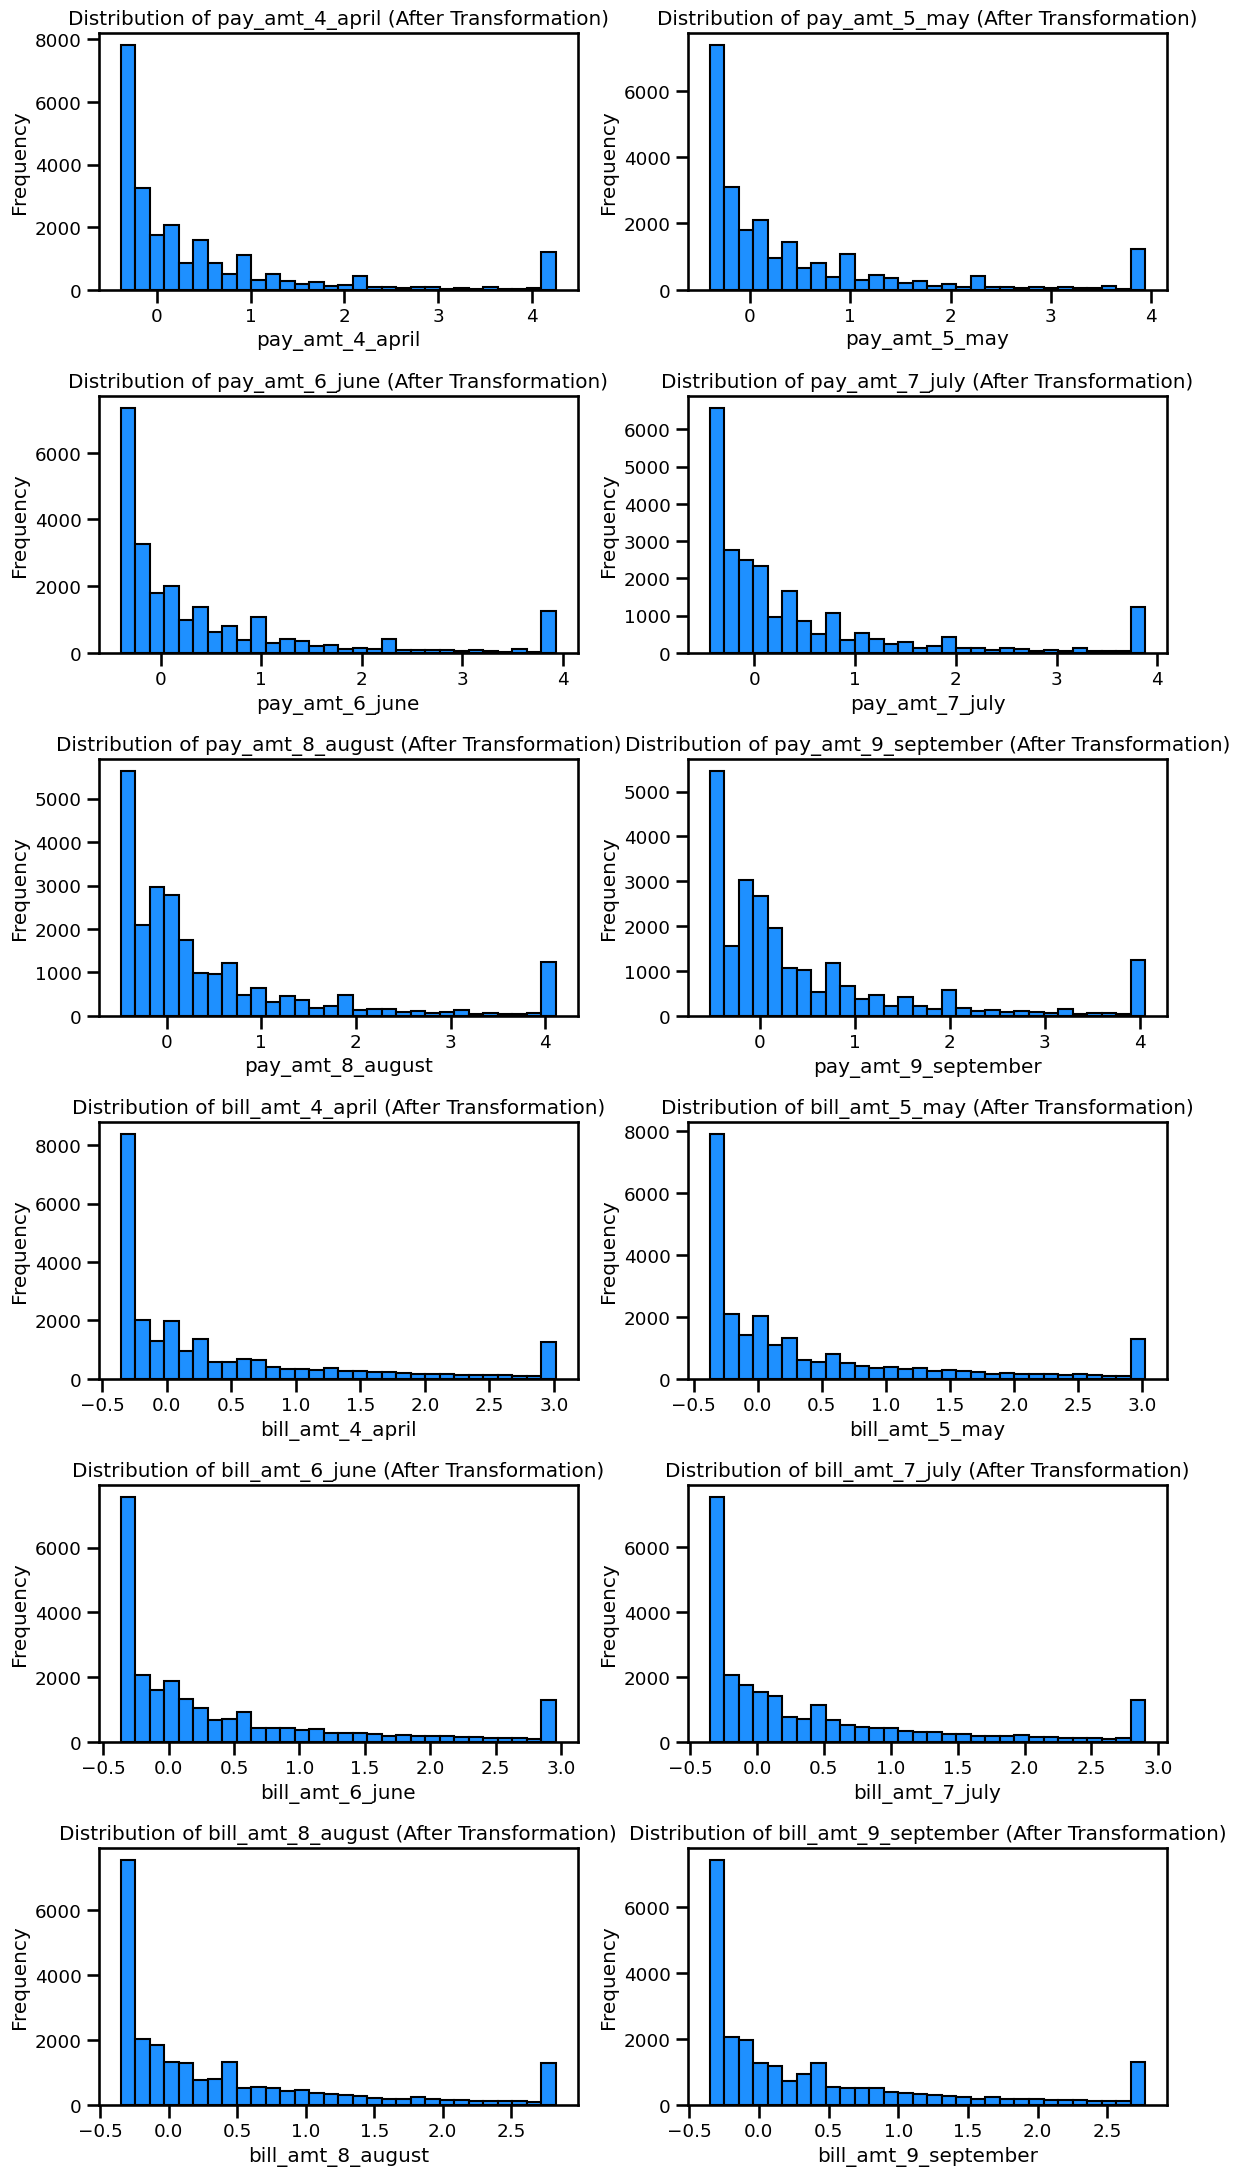

Transformed Skewness:
pay_amt_4_april         2.065319
pay_amt_5_may           1.894903
pay_amt_6_june          1.882621
pay_amt_7_july          1.909869
pay_amt_8_august        1.879693
pay_amt_9_september     1.761521
bill_amt_4_april        1.540479
bill_amt_5_may          1.529604
bill_amt_6_june         1.504785
bill_amt_7_july         1.481400
bill_amt_8_august       1.459796
bill_amt_9_september    1.442956
dtype: float64
Skewness Before and After Transformation:
Row Count Before Transformation
23972
Row Count After Transformation
23972
{'baseline': {'pay_amt_4_april': 10.697865192659426, 'pay_amt_5_may': 10.854087480972698, 'pay_amt_6_june': 11.740485259353425, 'pay_amt_7_july': 18.539164165559654, 'pay_amt_8_august': 31.992700945030172, 'pay_amt_9_september': 15.618872786745952, 'bill_amt_4_april': 2.8723358594706108, 'bill_amt_5_may': 2.8912686644886225, 'bill_amt_6_june': 2.855294865724809, 'bill_amt_7_july': 3.1826056141119867, 'bill_amt_8_august': 2.6909841540641546, 'bill

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engineering_pipeline_utils import *

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the skewness dictionary
skewness_dict = {}

# Columns of interest for transformation
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september'
               ]


# Save the baseline skewness (using only X_train)
baseline_skewness = X_train[pay_columns].skew()
skewness_dict['baseline'] = baseline_skewness.to_dict()

# Plot the distribution before transformation (using only X_train)
color = 'limegreen'
fig, axes = plt.subplots(6, 2, figsize=(12, 22))
axes = axes.flatten()

for i, col in enumerate(pay_columns):
    axes[i].hist(X_train[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {col} (Before Transformation)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Baseline Skewness:")
print(baseline_skewness)

# Apply the transformation to X_train
# transformer = OutlierRemovalTransformer(columns=pay_columns)
transformer = WinsorRobustOutlierRemovalTransformer(columns=pay_columns)
X_train_transformed = transformer.fit_transform(X_train)

# Save the skewness after transformation (using only X_train_transformed)
transformed_skewness = X_train_transformed[pay_columns].skew()
skewness_dict['transformed'] = transformed_skewness.to_dict()

# Plot the distribution after transformation (using only X_train_transformed)
color = 'dodgerblue'
fig, axes = plt.subplots(6, 2, figsize=(12, 22))
axes = axes.flatten()

for i, col in enumerate(pay_columns):
    axes[i].hist(X_train_transformed[col], bins=30, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {col} (After Transformation)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Transformed Skewness:")
print(transformed_skewness)

# Optionally, print the skewness dictionary for easy comparison
print("Skewness Before and After Transformation:")
print('Row Count Before Transformation')
print(len(X_train))
print('Row Count After Transformation')
print(len(X_train_transformed))
print(skewness_dict)


### Pipeline Base - No Feature Engineering

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the numeric, categorical, and ordinal columns
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']
categorical_features = ['sex', 'marriage']
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may',
                    'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']

# Define the transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values with the mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode known categories, unknowns converted to 0
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing ordinal values with the most frequent value
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode known categories, unknowns converted to -1
])


# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Create the full pipeline with logistic regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.81      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.81      0.78      5993



## Feature Engineering Functions to Tansformers Explanation


To translate standard Python functions into `sklearn`-compatible preprocessing functions, you'll want to follow a structured approach that ensures compatibility with `sklearn` pipelines. Here’s a strategy you can use:

### 1. **Understand the Function's Purpose**
   - **What does the function do?** Determine the input, processing steps, and output.
   - **What is the data format?** Ensure that the function can handle `pandas DataFrame` or `numpy array` inputs and outputs, as these are typical in `sklearn`.

### 2. **Define the Transformer Class**
   - **Inherit from `BaseEstimator` and `TransformerMixin`:** This allows your class to be used in `sklearn` pipelines.
   - **Create the `__init__` method:** Define any parameters the function might need. Store them as attributes to make the transformer customizable.
     ```python
     from sklearn.base import BaseEstimator, TransformerMixin

     class CustomTransformer(BaseEstimator, TransformerMixin):
         def __init__(self, param1=default_value1, param2=default_value2):
             self.param1 = param1
             self.param2 = param2
     ```

### 3. **Implement the `fit` Method**
   - **Determine if fitting is necessary:** If your function doesn’t require learning from the data (like scaling or imputing), you can just return `self`.
   - **Use `X` and `y` as inputs:** Even if your transformer doesn’t use `y`, include it for pipeline compatibility.
     ```python
     def fit(self, X, y=None):
         # Perform any fitting logic here
         return self
     ```

### 4. **Implement the `transform` Method**
   - **Apply the transformation logic:** This is where the actual feature engineering occurs.
   - **Ensure compatibility:** Make sure the method returns a transformed `numpy array` or `pandas DataFrame` with the same number of rows as the input.
   - **Consider column names:** If working with `pandas`, ensure that column names are handled correctly, especially if your transformer changes the number of columns.
     ```python
     def transform(self, X):
         # Apply the transformation logic
         X_transformed = your_function(X, self.param1, self.param2)
         return X_transformed
     ```

### 5. **Handle Edge Cases**
   - **Missing Values:** Ensure the function handles or raises errors for missing values if applicable.
   - **Data Types:** Make sure the transformer handles different data types (categorical, numerical) correctly.
   - **Scalability:** Consider the function’s performance on large datasets.

### 6. **Testing the Transformer**
   - **Unit Tests:** Write tests to ensure that your transformer behaves as expected. Verify that it integrates seamlessly into an `sklearn` pipeline.
   - **Integration Testing:** Test the transformer within a pipeline to ensure it works in combination with other steps.

### 7. **Documentation**
   - **Docstrings:** Clearly document the parameters, methods, and expected inputs/outputs.
   - **Examples:** Provide usage examples in the docstrings to show how the transformer can be used in practice.

### 8. **Performance Considerations**
   - **Efficiency:** Ensure that the transformation is performed efficiently, especially if the function will be used in production or on large datasets.
   - **Parallel Processing:** Consider if the transformation can benefit from parallel processing, and leverage libraries like `joblib` if necessary.

### Example: Converting a Standard Function to an sklearn Transformer

Let’s say you have a function that bins a numerical feature into categories:

```python
def bin_column(X, column_name, bins, labels):
    X[column_name + '_binned'] = pd.cut(X[column_name], bins=bins, labels=labels)
    return X
```

You would convert this into an `sklearn` transformer like this:

```python
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class BinColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name, bins, labels):
        self.column_name = column_name
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Avoid altering the original DataFrame
        X[self.column_name + '_binned'] = pd.cut(X[self.column_name], bins=self.bins, labels=self.labels)
        return X
```

### Summary
This structured approach will help you systematically convert your feature engineering functions into sklearn-compatible transformers, ensuring they integrate smoothly into your machine learning pipelines. By focusing on compatibility, documentation, and performance, you’ll streamline the process and reduce potential issues when building complex models.



### 1. **Terminology: Converting a Function to an sklearn Transformer**
   - Yes, the terminology is correct. When you "convert a function to an sklearn transformer," you're essentially taking a function that performs a specific transformation on your data and wrapping it in a class that implements `sklearn`’s `BaseEstimator` and `TransformerMixin`. This allows the function to be used as a step in an `sklearn` pipeline, which is a common workflow in machine learning projects.

### 2. **Role of `BaseEstimator` and `TransformerMixin`**
   - **`BaseEstimator`:** This is a base class in `sklearn` that provides basic functionality for all estimators (models, transformers, etc.). It handles things like parameter setting and comparison (`get_params`, `set_params`), making it easier to integrate with `sklearn`'s grid search and other meta-algorithms.
   - **`TransformerMixin`:** This mixin provides the `fit_transform` method, which is a convenience method that combines `fit` and `transform` into one step. It’s especially useful when you want to transform your data right after fitting.

   Together, these classes make your custom transformer compatible with `sklearn`'s pipeline framework, allowing it to work seamlessly with other transformers and estimators.

### 3. **What is `self`?**
   - **`self`:** This is a reference to the instance of the class itself. When you create an object from a class, `self` allows you to access the attributes and methods of that object within the class definition. In the context of the transformer, `self` is used to store parameters (e.g., `column_name`, `bins`, `labels`) and to refer to them later during the `fit` and `transform` processes.

   ```python
   def __init__(self, column_name, bins, labels):
       self.column_name = column_name  # 'self.column_name' refers to the instance variable
       self.bins = bins
       self.labels = labels
   ```

### 4. **Why Include `y` in `fit` Method?**
   - **`y` is included for compatibility:** Even though `y` is not used in this specific transformer, it is included in the `fit` method to maintain compatibility with `sklearn`'s pipeline interface. Some transformers might need the target variable (`y`) to learn the transformation (e.g., scaling based on class labels, custom binning). Including `y` in the method signature ensures that the transformer can be easily swapped with others that do require `y`.

   ```python
   def fit(self, X, y=None):
       return self
   ```

   In this case, since no fitting is required, the `fit` method simply returns `self`.

### 5. **Using Standard Python Code in Transform Method**
   - **Yes, you can use standard Python code and functions in the `transform` method.** The `transform` method is where you implement the logic that will modify the data. You can use any standard Python libraries, like `pandas`, `numpy`, or even custom logic, as long as the output is in a format that `sklearn` can handle (typically a `pandas DataFrame` or `numpy array`).

   In the example provided:

   ```python
   def transform(self, X):
       X = X.copy()  # Avoid altering the original DataFrame
       X[self.column_name + '_binned'] = pd.cut(X[self.column_name], bins=self.bins, labels=self.labels)
       return X
   ```

   - `X = X.copy()`: This ensures that you don’t modify the original data but instead work on a copy.
   - `pd.cut(...)`: This is a standard `pandas` function used to bin continuous data into discrete intervals.
   - The result is then returned, which can be used in the next step of the pipeline.

### Summary
When converting functions to `sklearn` transformers:
- **`BaseEstimator` and `TransformerMixin`**: Ensure your transformer integrates seamlessly into `sklearn` pipelines.
- **`self`**: Manages instance variables and methods.
- **`y` in `fit`**: Ensures compatibility, even if not used.
- **Transform method**: Allows standard Python code to apply transformations, making it easy to implement your feature engineering logic.

This approach ensures that your custom transformers are both powerful and flexible, fitting into the broader `sklearn` ecosystem.

### Transofrmations Testing & Debugging

To effectively test and validate each feature engineering step in your `sklearn` pipeline, it's essential to follow a systematic approach. Here's a general framework that will allow you to test and visualize the output for each transformation:

### Framework to Test Feature Engineering Steps

#### 1. **Set Up the Environment**
   - **Load the Data**: Start by loading the dataset you are working with.
   - **Select Columns**: Ensure you select the relevant columns required for each transformation.
   - **Train-Test Split**: If not already done, split the data into training and test sets to avoid data leakage.

#### 2. **Implement the Pipeline**
   - **Single Transformer Pipelines**: Create individual pipelines that include just one feature engineering transformer at a time. This allows you to isolate and test each transformation separately.
   - **Preprocessing Steps**: If needed, include any basic preprocessing steps (like missing value imputation) before applying the transformer.

#### 3. **Apply the Transformer**
   - **Fit and Transform**: Fit the pipeline to the training data and transform it. This will apply the transformation and create the new feature.
   - **Compare Before and After**: Compare the original data with the transformed data to ensure the transformation is working as expected.

#### 4. **Validate the Transformation**
   - **Summary Statistics**: Calculate and print summary statistics (mean, median, standard deviation) of the new feature to check if the values make sense.
   - **Visual Inspection**:
     - **Histograms/Bar Plots**: Plot histograms or bar plots of the new feature to visualize its distribution.
     - **Scatter Plots**: If applicable, create scatter plots to visualize relationships between the new feature and other relevant variables.

#### 5. **Debugging and Iteration**
   - **Check for Errors**: Ensure that there are no errors during the transformation, and that all rows and columns are accounted for.
   - **Iterate if Necessary**: If something looks off, revisit the transformer code, adjust parameters, or tweak the logic as needed.

### Specific Steps for Each Transformer

1. **Binary Feature Transformers** (e.g., `HighRiskDelayFeatureTransformer`):
   - **Test**: Print the counts of `True` and `False` values in the new binary feature.
   - **Visualize**: Use a bar plot to visualize the distribution of the binary feature.

2. **Ratio Calculators** (e.g., `BillToPaymentRatioTransformer`):
   - **Test**: Print the minimum, maximum, and mean of the ratio to ensure the values are within expected ranges.
   - **Visualize**: Plot a histogram to visualize the distribution of the ratio.

3. **Aggregate Features** (e.g., `TotalPaymentsTransformer`):
   - **Test**: Compare a few manually calculated rows of the total payment with the values generated by the transformer.
   - **Visualize**: Use a histogram to check the distribution of the total payments.

4. **Interaction Features** (e.g., `EducationMarriageInteractionTransformer`):
   - **Test**: Print the unique values of the interaction feature to ensure the combinations are logical.
   - **Visualize**: Use a bar plot to show the frequency of each interaction category.

5. **Statistical Features** (e.g., `PaymentStdTransformer`):
   - **Test**: Print the standard deviation values and ensure they make sense for the given data.
   - **Visualize**: Plot a histogram of the standard deviations to check for any anomalies.


### Summary

1. **Isolate Each Transformation**: Use individual pipelines to test each transformer separately.
2. **Check Outputs**: Compare transformed data with original data to ensure correctness.
3. **Visualize**: Use plots to visually inspect the results of each transformation.
4. **Adjust**: Iterate as necessary to ensure each transformer is functioning as expected.

This systematic approach will help you confidently validate each feature engineering step, ensuring they contribute positively to your overall model pipeline.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engineering_pipeline_utils import *

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the columns
numeric_features = ['age', 'limit_bal']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']
categorical_features = ['sex', 'marriage']
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may',
                    'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']

# Step 1: Outlier Removal Before Feature Engineering
outlier_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns))
])

# Apply outlier removal
X_train_outliers_removed = outlier_pipeline.fit_transform(X_train)

# Step 2: Set Up the Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('high_risk_delay', HighRiskDelayFeatureTransformer(delay_columns=delay_columns))
    # ('severe_delay_count', SevereDelayCountTransformer(delay_columns=delay_columns)),
    # ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns)),
    # ('severe_delay_payment_ratio', SevereDelayPaymentRatioTransformer(pay_columns=pay_columns)),
    # ('avg_payment_severe_delays', AvgPaymentSevereDelaysTransformer()),
    # ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Step 3: Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Step 4: Visual Inspection and Validation of Features
# For example, visualize one of the engineered features
# sns.histplot(X_train_fe['total_payments'], kde=True)
# plt.title('Distribution of Total Payments')
# plt.show()

# Step 5: Full Pipeline Including Preprocessing and Model
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Step 1: Feature Engineering
    ('preprocessor', preprocessor),                         # Step 2: Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Step 3: Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



#### Transformer Testing - HighRiskDelayFeatureTransformer

       high_risk_delay target
27420            False      0
15350            False      1
26641            False      0
21618            False      0
11570            False      1
high_risk_delay
False    23026
True       946
Name: count, dtype: int64


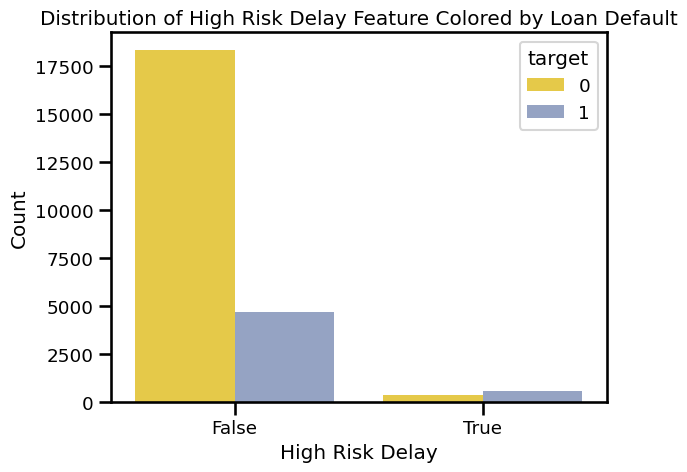

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [35]:
# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['high_risk_delay'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['high_risk_delay', 'target']].head())

# Check the distribution of the high_risk_delay feature
print(X_train_fe['high_risk_delay'].value_counts())

# Visualize the distribution of the high_risk_delay feature
sns.countplot(x='high_risk_delay', hue='target', data=X_train_fe, palette='Set2_r')
plt.title('Distribution of High Risk Delay Feature Colored by Loan Default')
plt.xlabel('High Risk Delay')
plt.ylabel('Count')
plt.show()


# Step 5: Full Pipeline Including Preprocessing and Model
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Step 1: Feature Engineering
    ('preprocessor', preprocessor),                         # Step 2: Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Step 3: Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - SevereDelayCountTransformer
The SevereDelayCountTransformer calculates the number of months with severe delays (3 months or more) for each row.

       severe_delay_count
27420                   0
15350                   0
26641                   0
21618                   0
11570                   0
severe_delay_count
0    23026
1      522
2      177
4      121
3       83
5       24
6       19
Name: count, dtype: int64


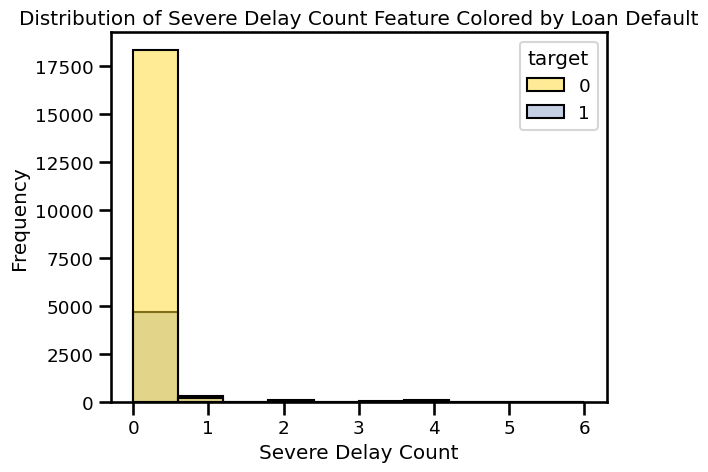

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [28]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('severe_delay_count', SevereDelayCountTransformer(delay_columns=delay_columns))
    # ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns)),
    # ('severe_delay_payment_ratio', SevereDelayPaymentRatioTransformer(pay_columns=pay_columns)),
    # ('avg_payment_severe_delays', AvgPaymentSevereDelaysTransformer()),
    # ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Step 3: Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Step 4: Visual Inspection and Validation of Features

# Print the first few rows to inspect the new feature
print(X_train_fe[['severe_delay_count']].head())

# Check the distribution of the severe_delay_count feature
print(X_train_fe['severe_delay_count'].value_counts())

# Visualize the distribution of the severe_delay_count feature
# Merge the transformed features with the target variable if not already done
X_train_fe['target'] = y_train.values

# Visualize the distribution of the severe_delay_count feature colored by default status
sns.histplot(data=X_train_fe, x='severe_delay_count', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Severe Delay Count Feature Colored by Loan Default')
plt.xlabel('Severe Delay Count')
plt.ylabel('Frequency')
plt.show()

# Step 5: Full Pipeline Including Preprocessing and Model
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Step 1: Feature Engineering
    ('preprocessor', preprocessor),                         # Step 2: Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Step 3: Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **CumulativeDelayTransformer**

Calculates a cumulative delay score for each row based on the severity of payment delays across different months. It maps each delay level to a numerical value (e.g., 1 month delay = 1, 2 months delay = 2, etc.) and sums these values to create a cumulative delay score.

       cumulative_delay target
27420                 0      0
15350                12      1
26641                 0      0
21618                 0      0
11570                 0      1
count    23972.000000
mean         1.681879
std          3.584728
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         36.000000
Name: cumulative_delay, dtype: float64


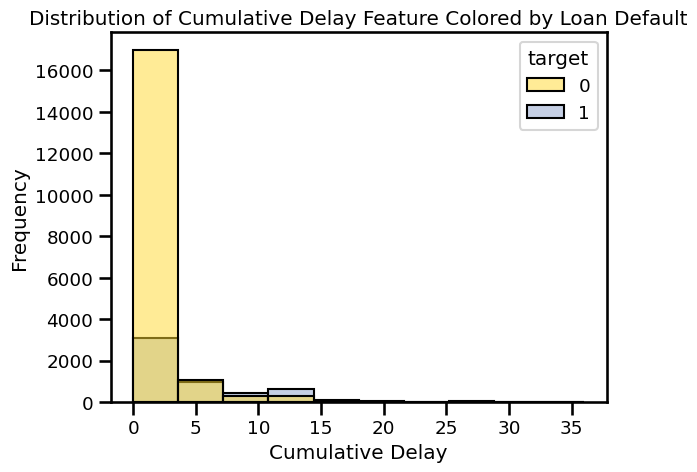

In [43]:
# Ensure that the transformed data is in a DataFrame format
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['cumulative_delay'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print and visualize the cumulative delay feature
print(X_train_fe[['cumulative_delay', 'target']].head())
print(X_train_fe['cumulative_delay'].describe())

# Visualize the distribution of the cumulative_delay feature colored by loan default status
sns.histplot(data=X_train_fe, x='cumulative_delay', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Cumulative Delay Feature Colored by Loan Default')
plt.xlabel('Cumulative Delay')
plt.ylabel('Frequency')
plt.show()


#### Transformer Testing - **SevereDelayPaymentRatioTransformer**
Purpose: The SevereDelayPaymentRatioTransformer calculates the ratio of the number of severe delays to the total payment made by the customer. This ratio is then scaled by a specified factor to make the values more interpretable.

       severe_delay_payment_ratio  severe_delay_count target
27420                         0.0                   0      0
15350                         0.0                   0      1
26641                         0.0                   0      0
21618                         0.0                   0      0
11570                         0.0                   0      1
count    2.397200e+04
mean     3.519264e+02
std      1.412914e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.899941e+06
Name: severe_delay_payment_ratio, dtype: float64


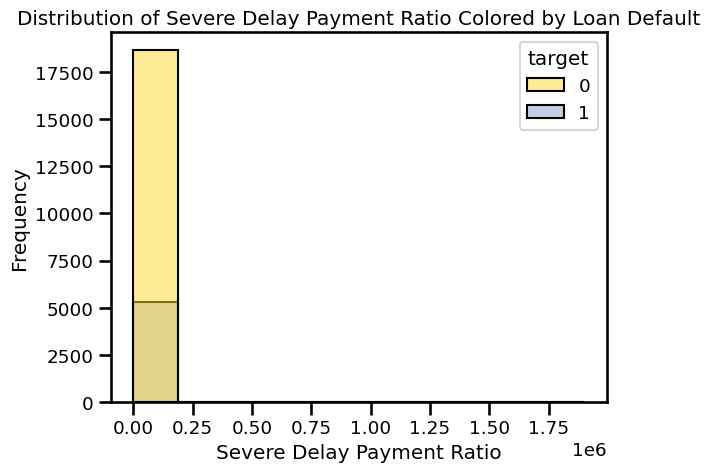

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [41]:
# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('severe_delay_count', SevereDelayCountTransformer(delay_columns=delay_columns)),  # First, create severe_delay_count
    ('severe_delay_payment_ratio', SevereDelayPaymentRatioTransformer(pay_columns=pay_columns))  # Then create severe_delay_payment_ratio
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['severe_delay_count', 'severe_delay_payment_ratio'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['severe_delay_payment_ratio', 'severe_delay_count', 'target']].head())

# Check the distribution of the severe_delay_payment_ratio feature
print(X_train_fe['severe_delay_payment_ratio'].describe())

# Visualize the distribution of the severe_delay_payment_ratio feature colored by loan default status
sns.histplot(data=X_train_fe, x='severe_delay_payment_ratio', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Severe Delay Payment Ratio Colored by Loan Default')
plt.xlabel('Severe Delay Payment Ratio')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **AvgPaymentSevereDelaysTransformer**
 Calculates the average payment amount made during months with severe delays. This feature helps assess the payment behavior of customers during months when they experienced significant payment delays.

       avg_payment_severe_delays target
27420                        0.0      0
15350                        0.0      1
26641                        0.0      0
21618                        0.0      0
11570                        0.0      1
count    23972.000000
mean        -0.010461
std          0.094743
min         -0.523821
25%          0.000000
50%          0.000000
75%          0.000000
max          2.968321
Name: avg_payment_severe_delays, dtype: float64


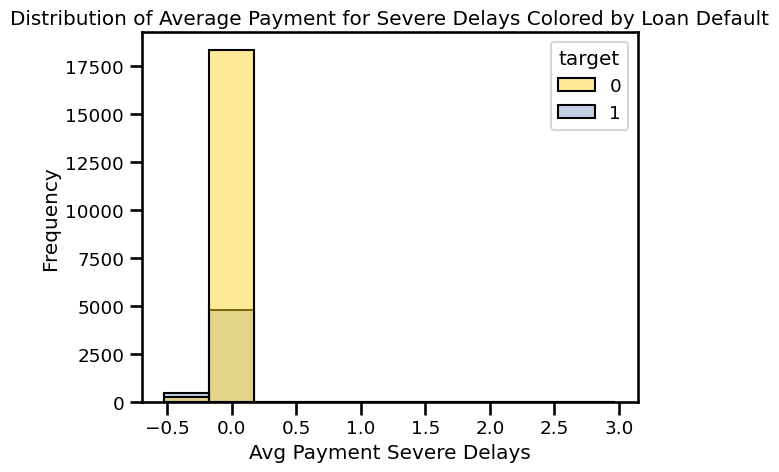

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [45]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('avg_payment_severe_delays', AvgPaymentSevereDelaysTransformer()),
    # ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['avg_payment_severe_delays'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['avg_payment_severe_delays', 'target']].head())

# Check the distribution of the avg_payment_severe_delays feature
print(X_train_fe['avg_payment_severe_delays'].describe())

# Visualize the distribution of the avg_payment_severe_delays feature colored by loan default status
sns.histplot(data=X_train_fe, x='avg_payment_severe_delays', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Average Payment for Severe Delays Colored by Loan Default')
plt.xlabel('Avg Payment Severe Delays')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **DeferredAndDecreasingPaymentsTransformer**
Identifies if a customer's payments are consistently decreasing starting from any month with any delay. This feature is important for assessing customer behavior patterns that may indicate financial distress.

       deferred_and_decreasing_payments target
27420                             False      0
15350                             False      1
26641                             False      0
21618                             False      0
11570                             False      1
deferred_and_decreasing_payments
False    22251
True      1721
Name: count, dtype: int64


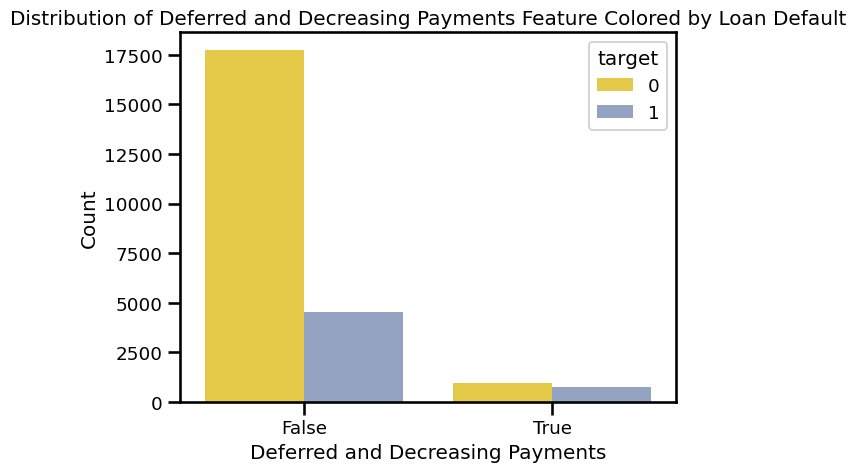

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [47]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary if it's a NumPy array:
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['deferred_and_decreasing_payments'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['deferred_and_decreasing_payments', 'target']].head())

# Check the distribution of the deferred_and_decreasing_payments feature
print(X_train_fe['deferred_and_decreasing_payments'].value_counts())

# Visualize the distribution of the deferred_and_decreasing_payments feature colored by loan default status
sns.countplot(x='deferred_and_decreasing_payments', hue='target', data=X_train_fe, palette='Set2_r')
plt.title('Distribution of Deferred and Decreasing Payments Feature Colored by Loan Default')
plt.xlabel('Deferred and Decreasing Payments')
plt.ylabel('Count')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **SevereDeferredAndDecreasingPaymentsTransformer**

Identifies if a customer has experienced severe deferred payments and whether their payments are consistently decreasing over time. This feature helps identify customers who might be in severe financial distress.

       severe_deferred_and_decreasing_payments target
27420                                    False      0
15350                                    False      1
26641                                    False      0
21618                                    False      0
11570                                    False      1
severe_deferred_and_decreasing_payments
False    23813
True       159
Name: count, dtype: int64


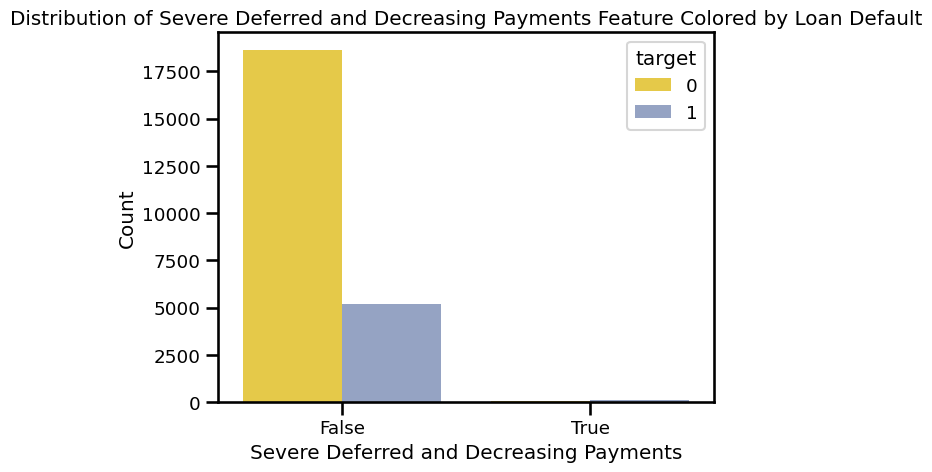

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [49]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['severe_deferred_and_decreasing_payments'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['severe_deferred_and_decreasing_payments', 'target']].head())

# Check the distribution of the severe_deferred_and_decreasing_payments feature
print(X_train_fe['severe_deferred_and_decreasing_payments'].value_counts())

# Visualize the distribution of the severe_deferred_and_decreasing_payments feature colored by loan default status
sns.countplot(x='severe_deferred_and_decreasing_payments', hue='target', data=X_train_fe, palette='Set2_r')
plt.title('Distribution of Severe Deferred and Decreasing Payments Feature Colored by Loan Default')
plt.xlabel('Severe Deferred and Decreasing Payments')
plt.ylabel('Count')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **SevereDeferredAndAnyDecreasingPaymentsTransformer**
The SevereDeferredAndAnyDecreasingPaymentsTransformer identifies if a customer has experienced severe deferred payments and whether there has been any decrease in their payment amounts over time. This feature helps to highlight customers who may be starting to struggle with their financial obligations.

       severe_deferred_and_any_decreasing_payments target
27420                                        False      0
15350                                        False      1
26641                                        False      0
21618                                        False      0
11570                                        False      1
severe_deferred_and_any_decreasing_payments
False    23026
True       946
Name: count, dtype: int64


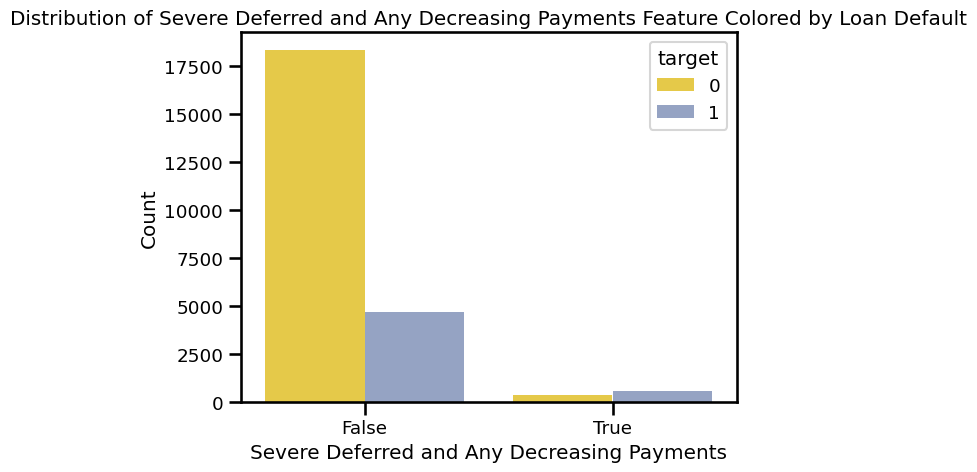

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [51]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    # ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['severe_deferred_and_any_decreasing_payments'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['severe_deferred_and_any_decreasing_payments', 'target']].head())

# Check the distribution of the severe_deferred_and_any_decreasing_payments feature
print(X_train_fe['severe_deferred_and_any_decreasing_payments'].value_counts())

# Visualize the distribution of the severe_deferred_and_any_decreasing_payments feature colored by loan default status
sns.countplot(x='severe_deferred_and_any_decreasing_payments', hue='target', data=X_train_fe, palette='Set2_r')
plt.title('Distribution of Severe Deferred and Any Decreasing Payments Feature Colored by Loan Default')
plt.xlabel('Severe Deferred and Any Decreasing Payments')
plt.ylabel('Count')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **TotalPaymentsTransformer**
Calculates the total amount of payments made by a customer across all specified months. This feature helps to assess the overall payment behavior of the customer over time.

       total_payments target
27420       -4.792606      0
15350        1.782052      1
26641       -3.905248      0
21618       -3.806569      0
11570       28.264772      1
count    23972.000000
mean         4.990147
std          9.115238
min         -4.792606
25%         -1.679848
50%          2.087613
75%          8.972105
max         41.667775
Name: total_payments, dtype: float64


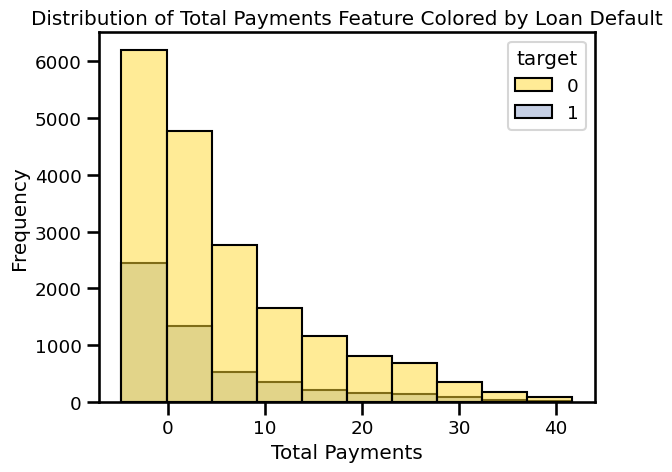

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [53]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    # ('avg_payment', AvgPaymentTransformer()),
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary if it's a NumPy array:
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['total_payments'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['total_payments', 'target']].head())

# Check the distribution of the total_payments feature
print(X_train_fe['total_payments'].describe())

# Visualize the distribution of the total_payments feature colored by loan default status
sns.histplot(data=X_train_fe, x='total_payments', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Total Payments Feature Colored by Loan Default')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **AvgPaymentTransformer**

Calculates the average payment made by a customer across all specified months. This feature provides insight into the consistency and level of payments made by the customer over time.

       avg_payment target
27420    -0.798768      0
15350     0.297009      1
26641    -0.650875      0
21618    -0.634428      0
11570     4.710795      1
count    23972.000000
mean         0.831691
std          1.519206
min         -0.798768
25%         -0.279975
50%          0.347936
75%          1.495351
max          6.944629
Name: avg_payment, dtype: float64


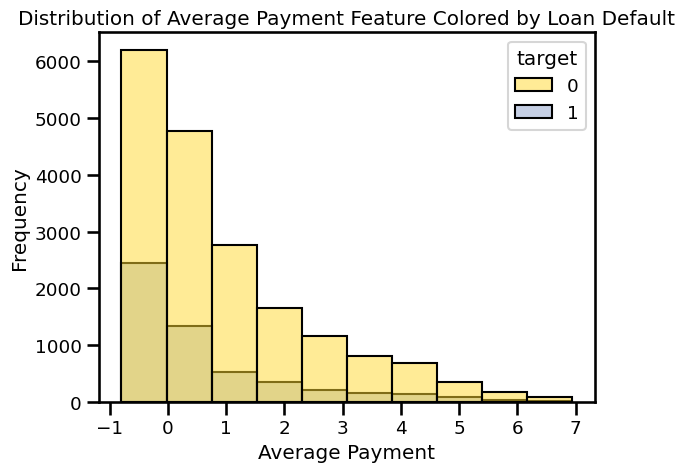

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [56]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),  # First, calculate total payments
    ('avg_payment', AvgPaymentTransformer())  # Then, calculate average payment
    # ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    # ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    # ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),
    # ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['avg_payment'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['avg_payment', 'target']].head())

# Check the distribution of the avg_payment feature
print(X_train_fe['avg_payment'].describe())

# Visualize the distribution of the avg_payment feature colored by loan default status
sns.histplot(data=X_train_fe, x='avg_payment', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Average Payment Feature Colored by Loan Default')
plt.xlabel('Average Payment')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **PaymentStdTransformer**
Calculates the standard deviation of payments made by a customer across all specified months. This feature captures the variability in a customer's payment amounts, which can be an indicator of financial instability.

       payment_std target
27420     0.056407      0
15350     0.350739      1
26641     0.081655      0
21618     0.112074      0
11570     1.612874      1
count    23972.000000
mean         0.582358
std          0.483360
min          0.017354
25%          0.191098
50%          0.413362
75%          0.903483
max          2.116921
Name: payment_std, dtype: float64


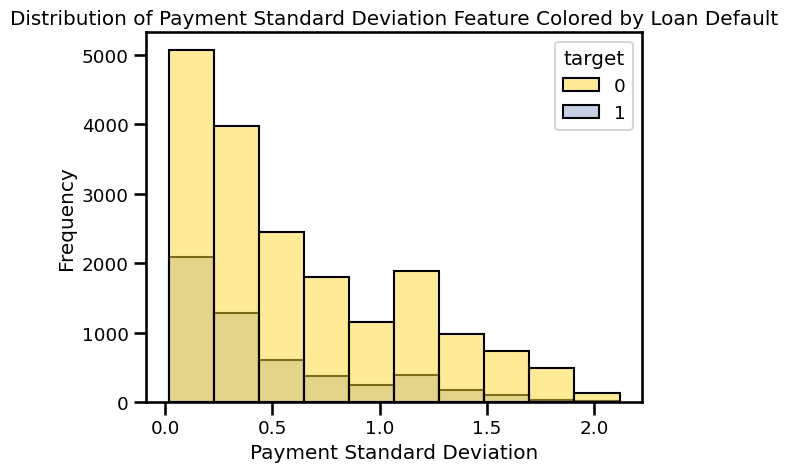

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [57]:
# Set up the feature engineering pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Convert the result to a DataFrame if necessary
if isinstance(X_train_fe, np.ndarray):
    X_train_fe = pd.DataFrame(X_train_fe, columns=list(X_train_outliers_removed.columns) + ['payment_std'])

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['payment_std', 'target']].head())

# Check the distribution of the payment_std feature
print(X_train_fe['payment_std'].describe())

# Visualize the distribution of the payment_std feature colored by loan default status
sns.histplot(data=X_train_fe, x='payment_std', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Payment Standard Deviation Feature Colored by Loan Default')
plt.xlabel('Payment Standard Deviation')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **WeightedPaymentSumTransformer**
Calculates a weighted sum of payments made by a customer across all specified months. More recent payments are given higher weights to capture the importance of recent payment behavior in assessing financial stability.

       weighted_payment_sum target
27420            -17.208132      0
15350              7.365580      1
26641            -14.314105      0
21618            -12.559933      0
11570             98.858938      1
count    23972.000000
mean        17.541242
std         32.162333
min        -17.208132
25%         -5.928495
50%          7.254251
75%         31.984274
max        144.638282
Name: weighted_payment_sum, dtype: float64


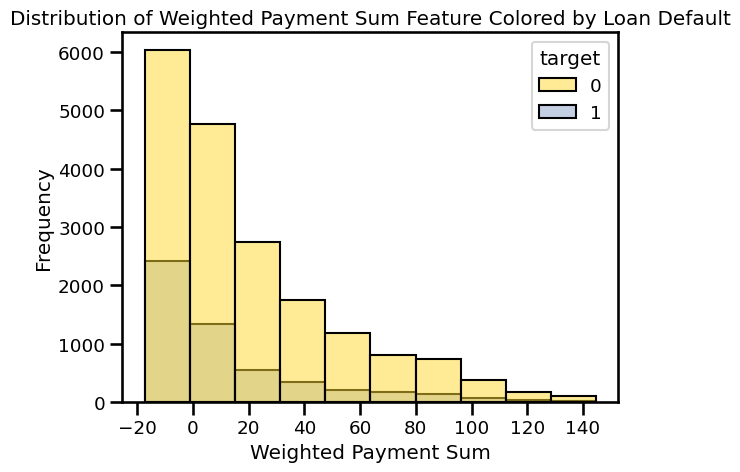

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [75]:
# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns))
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['weighted_payment_sum', 'target']].head())

# Check the distribution of the weighted_payment_sum feature
print(X_train_fe['weighted_payment_sum'].describe())

# Visualize the distribution of the weighted_payment_sum feature colored by loan default status
sns.histplot(data=X_train_fe, x='weighted_payment_sum', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Weighted Payment Sum Feature Colored by Loan Default')
plt.xlabel('Weighted Payment Sum')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - **DebtToLimitRatioTransformer**
Objective: This transformer calculates the ratio of the total debt (sum of bill amounts) to the credit limit (limit_bal). This ratio can help identify customers who are utilizing a high percentage of their available credit, which may correlate with a higher risk of default.

       total_bills  debt_to_limit_ratio target
27420    -2.153038            -0.000007      0
15350     2.267672             0.000045      1
26641    -2.086725            -0.000026      0
21618    -2.082579            -0.000042      0
11570     7.611646             0.000038      1
count    23972.000000
mean         0.000009
std          0.000041
min         -0.000215
25%         -0.000010
50%          0.000001
75%          0.000036
max          0.000471
Name: debt_to_limit_ratio, dtype: float64


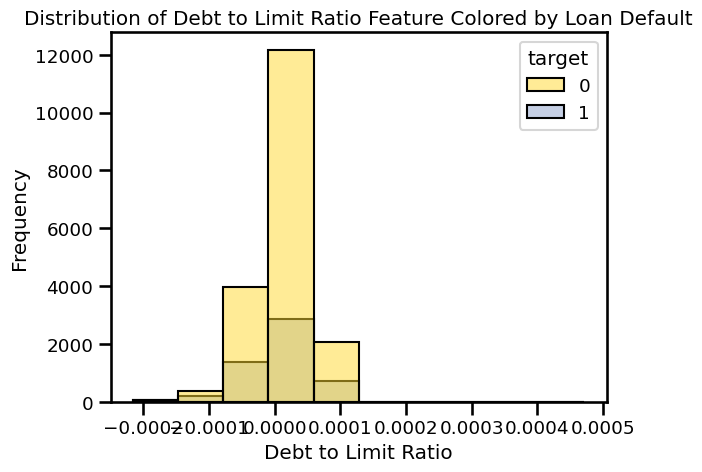

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [85]:
# Define the bill columns and limit balance column
bill_columns = [
    'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
    'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september'
]
limit_bal_column = 'limit_bal'

# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('total_bills', TotalBillsTransformer(bill_columns=bill_columns)),
    ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column=limit_bal_column))
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new features
print(X_train_fe[['total_bills', 'debt_to_limit_ratio', 'target']].head())

# Check the distribution of the debt_to_limit_ratio feature
print(X_train_fe['debt_to_limit_ratio'].describe())

# Visualize the distribution of the debt_to_limit_ratio feature colored by loan default status
sns.histplot(data=X_train_fe, x='debt_to_limit_ratio', hue='target', kde=False, bins=10, palette='Set2_r')
plt.title('Distribution of Debt to Limit Ratio Feature Colored by Loan Default')
plt.xlabel('Debt to Limit Ratio')
plt.ylabel('Frequency')
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


#### Transformer Testing - EducationMarriageInteractionTransformer

      education_marriage target
27420       University_1      0
15350      High School_3      1
26641  Graduate School_2      0
21618       University_2      0
11570       University_2      1
education_marriage
University_2         5644
University_1         5475
Graduate School_2    5462
Graduate School_1    2963
High School_1        2259
High School_2        1486
Other/Unknown_1       190
Other/Unknown_2       181
University_3          131
High School_3         126
Graduate School_3      48
Other/Unknown_3         7
Name: count, dtype: int64


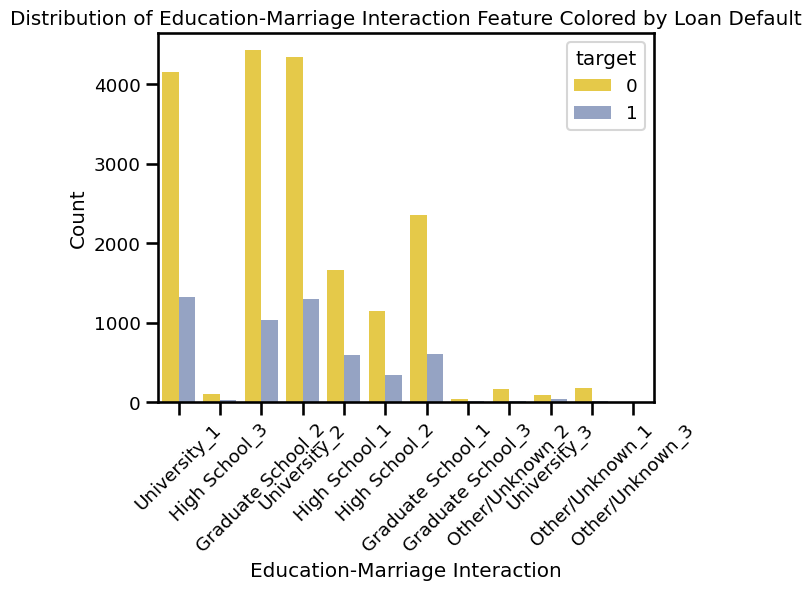

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



In [87]:
# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('education_marriage_interaction', EducationMarriageInteractionTransformer(education_column='education', marriage_column='marriage'))
])

# Apply Feature Engineering
X_train_fe = feature_engineering_pipeline.fit_transform(X_train_outliers_removed)

# Add the target variable back to the DataFrame for visualization purposes
X_train_fe['target'] = y_train.values

# Print the first few rows to inspect the new feature
print(X_train_fe[['education_marriage', 'target']].head())

# Check the distribution of the education_marriage feature
print(X_train_fe['education_marriage'].value_counts())

# Visualize the distribution of the education_marriage feature colored by loan default status
sns.countplot(data=X_train_fe, x='education_marriage', hue='target', palette='Set2_r')
plt.title('Distribution of Education-Marriage Interaction Feature Colored by Loan Default')
plt.xlabel('Education-Marriage Interaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Train the model using the full pipeline
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Feature Engineering
    ('preprocessor', preprocessor),                         # Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Model
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


## Feature Engineering Full Pipeline Testing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from feature_engineering_pipeline_utils import (HighRiskDelayFeatureTransformer, SevereDelayCountTransformer, CumulativeDelayTransformer,
                                                SevereDelayPaymentRatioTransformer, AvgPaymentSevereDelaysTransformer, DeferredAndDecreasingPaymentsTransformer,
                                                SevereDeferredAndDecreasingPaymentsTransformer, SevereDeferredAndAnyDecreasingPaymentsTransformer,
                                                TotalPaymentsTransformer, AvgPaymentTransformer, PaymentStdTransformer, WeightedPaymentSumTransformer,
                                                TotalBillsTransformer, DebtToLimitRatioTransformer, EducationMarriageInteractionTransformer, WinsorRobustOutlierRemovalTransformer)

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the columns
numeric_features = ['age', 'limit_bal']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']
categorical_features = ['sex', 'marriage']
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may',
                    'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
delay_columns = ['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']

# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('high_risk_delay', HighRiskDelayFeatureTransformer(delay_columns=delay_columns)),
    ('severe_delay_count', SevereDelayCountTransformer(delay_columns=delay_columns)),
    ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns)),
    ('severe_delay_payment_ratio', SevereDelayPaymentRatioTransformer(pay_columns=pay_columns)),
    ('avg_payment_severe_delays', AvgPaymentSevereDelaysTransformer()),
    ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    ('avg_payment', AvgPaymentTransformer()),
    ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    ('total_bills', TotalBillsTransformer(bill_columns=bill_columns)),  # First create total bills
    ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),  # Then create the ratio
    ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Step 2: Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pay_transformer = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('pay', pay_transformer, pay_columns),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Step 3: Final Pipeline
model_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Step 1: Feature Engineering
    ('preprocessor', preprocessor),                         # Step 2: Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))       # Step 3: Model
])

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.63      0.28      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.73      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



### Full Pipeline Analysis

It's puzzling that the feature engineering did not result in any noticeable improvement in model performance. There are a few possible reasons why this might be happening, and some steps you can take to diagnose and address the issue:

### **1. Feature Engineering Quality:**
   - **Relevance of Features:** Ensure that the engineered features are truly relevant to the target variable. Sometimes, engineered features might not be as informative as expected.
   - **Redundancy:** Some of the engineered features might be highly correlated with existing features, providing little additional information to the model.
   - **Scaling Issues:** Ensure that all features, especially the engineered ones, are being scaled appropriately in the pipeline.

### **2. Model Complexity:**
   - **Model Selection:** Logistic Regression might not be complex enough to capture the interactions or nuances introduced by the new features. Consider testing with more complex models like Random Forests, Gradient Boosting, or even neural networks.
   - **Feature Interaction:** Some interactions between features might only be captured by more complex models that can leverage non-linear relationships.

### **3. Pipeline Validation:**
   - **Double-Check Pipeline Execution:** Make sure that all steps in the pipeline are executed in the correct order and that the transformed features are actually being passed to the model.
   - **Check for Data Leakage:** Ensure that feature engineering and preprocessing steps are done on training data only and applied to test data in a way that avoids any information from the test set leaking into the training process.

### **4. Evaluate Feature Impact:**
   - **Feature Importance:** Use models like Random Forest or Gradient Boosting to evaluate the importance of each feature. This can help identify whether the new features are contributing any additional predictive power.
   - **Permutation Importance:** Evaluate how the model's performance changes when each feature is shuffled, which can indicate the importance of each feature.

### **5. Alternative Approaches:**
   - **Try Dimensionality Reduction:** Use techniques like PCA or Feature Selection to see if reducing the number of features to only the most impactful ones improves performance.
   - **Cross-Validation:** Use cross-validation to ensure the model's performance is consistent across different subsets of the data.

### **Next Steps:**
1. **Check Feature Importance:** You can use a tree-based model like RandomForest to see the importance of the engineered features.
2. **Experiment with Different Models:** Logistic regression is a good baseline, but try other models like XGBoost, Random Forest, or SVM to see if they can capture the interactions better.
3. **Analyze Correlations:** Check for multicollinearity between the engineered features and the existing ones. If there’s high correlation, the model might not be able to utilize the new features effectively.


In [11]:
# pip install dask[dataframe]

### Full Pipeline with LGBM Model

In [10]:
from lightgbm import LGBMClassifier

# Update the pipeline with LGBMClassifier
model_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),  # Step 1: Feature Engineering
    ('preprocessor', preprocessor),                         # Step 2: Preprocessing
    ('classifier', LGBMClassifier())                        # Step 3: Model
])

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 5304, number of negative: 18668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221258 -> initscore=-1.258350
[LightGBM] [Info] Start training from score -1.258350
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4667
           1       0.66      0.37      0.47      1326

    accuracy                           0.82      5993
   macro avg       0.75      0.66      0.68      5993
weighted avg       0.80      0.82      0.80      5993



#### Loan Data Utils

In [1]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [2]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [3]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


#### Catgeorical Data Utils Script

In [4]:
script_content = r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe `df` is already loaded

# List of categorical and ordinal columns
categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


'''

# Write the script to a file
with open("categorical_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to categorical_data_utils.py")
# Reload script to make functions available for use
import importlib
import categorical_data_utils
importlib.reload(categorical_data_utils)

from categorical_data_utils import *


Script successfully written to categorical_data_utils.py


#### Feature Engineering Script

In [5]:
script_content = r'''# feature_engineering_utils.py

import pandas as pd
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler

# ------- Remove Outliers Combined Method --------#

pay_columns = ['bill_amt_4_april', 'bill_amt_5_may',
       'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august',
       'bill_amt_9_september', 'pay_amt_4_april', 'pay_amt_5_may',
       'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august',
       'pay_amt_9_september']


def combined_outlier_handling(df, columns):
    # Step 1: Cap (Winsorize) outliers
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned[col] = mstats.winsorize(df_cleaned[col], limits=[0.01, 0.01])

    # Step 2: Apply IQR filtering
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # Step 3: Apply RobustScaler
    scaler = RobustScaler()
    df_cleaned[columns] = scaler.fit_transform(df_cleaned[columns])

    # Count the number of rows remaining after combined outlier handling
    rows_with_outliers = count_rows_with_outliers(df_cleaned, columns)

    return df_cleaned, rows_with_outliers

def generate_high_risk_delay_feature(df):
    """Generate a binary feature indicating if a customer has a delay of 3 months or more."""
    df['high_risk_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay'] for delay in row), axis=1)
    return df

def generate_severe_delay_count(df):
    """Generate a feature counting the number of months with severe delays (3 months or more)."""
    df['severe_delay_count'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']), axis=1)
    return df

def generate_cumulative_delay(df):
    """Generate a feature representing the cumulative sum of delay levels across months."""
    delay_mapping = {
        'No consumption': 0,
        'Paid in full': 0,
        'Revolving credit': 0,
        '1 month delay': 1,
        '2 months delay': 2,
        '3 months delay': 3,
        '4 months delay': 4,
        '5 months delay': 5,
        '6 months delay': 6,
        '7 months delay': 7,
        '8 months delay': 8,
        '9+ months delay': 9
    }
    df['cumulative_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(delay_mapping[delay] for delay in row), axis=1)
    return df

def calculate_cumulative_delay_risk(df):
    """
    Function to calculate and bin the cumulative delay risk.

    Parameters:
    df (pd.DataFrame): The input dataframe with a 'cumulative_delay' column.

    Returns:
    pd.DataFrame: The dataframe with an additional 'cumulative_delay_risk' column.
    """
    # Define the bins and labels
    bins = [0, 1, 5, 10, float('inf')]  # Adjust these thresholds based on your data
    labels = ['low', 'moderate', 'high', 'severe']

    # Create the binned feature as an ordered categorical feature
    df['cumulative_delay_risk'] = pd.cut(df['cumulative_delay'], bins=bins, labels=labels, right=False, ordered=True)

    return df


def generate_severe_delay_payment_ratio(df):
    """Generate a ratio feature of severe delays to total payments and scale it for interpretability."""
    scaling_factor = 10000  # Adjust this factor as needed
    df['severe_delay_payment_ratio'] = df['severe_delay_count'] / df[[
        'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
    ]].sum(axis=1)
    df['scaled_severe_delay_payment_ratio'] = df['severe_delay_payment_ratio'] * scaling_factor
    return df

def calculate_avg_payment_for_severe_delays(row):
    """Calculate the average payment amount for months with severe delays."""
    delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']
    total_payment = 0
    severe_delay_months = 0
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            total_payment += row[f'pay_amt_{i+4}_{month}']
            severe_delay_months += 1
    return total_payment / severe_delay_months if severe_delay_months > 0 else 0

def calculate_severe_delay_payment_ratio(row, scaling_factor=10000):
    total_payment = row[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                         'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum()

    # Prevent division by zero
    if total_payment == 0 or pd.isna(total_payment):
        return 0  # Avoid NaN by returning 0

    # Calculate the severe delay payment ratio
    ratio = row['severe_delay_count'] / total_payment

    # Apply scaling factor to make the ratio more meaningful
    return ratio * scaling_factor


# ------- Deferred & Decreasing Payments -------#

def flag_deferred_and_decreasing_payments(row):
    """Identify if payments are decreasing starting from any month with any delay."""
    delays = ['1 month delay', '2 months delay', '3 months delay',
              '4 months delay', '5 months delay', '6 months delay',
              '7 months delay', '8 months delay', '9+ months delay']

    # Initialize list to store payments in months with any delay
    delay_payments = []

    # Iterate over the months and collect payments for any delay
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

    # Check if payments are decreasing over time
    for j in range(1, len(delay_payments)):
        if delay_payments[j] > delay_payments[j-1]:
            return False  # Payments are not consistently decreasing

    return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing

def flag_severe_deferred_and_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

    # Return True if both conditions are met
    return deferred and decreasing


def flag_severe_deferred_and_any_decreasing_payments(row):
    delays = ['3 months delay', '4 months delay', '5 months delay',
              '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

    # Check if there are severe deferred payments
    deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

    # Check if payments are decreasing (any decrease)
    payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
    decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

    # Return True if both conditions are met
    return deferred and decreasing


# ------- Ratio & Interaction Features -------#

# Function to calculate bill-to-payment ratio for a specific month
def calculate_bill_to_payment_ratio(df, month):
    ratio_column = f'bill_to_payment_ratio_{month}'
    bill_column = f'bill_amt_{month}'
    pay_column = f'pay_amt_{month}'

    df[ratio_column] = df[bill_column] / df[pay_column].replace(0, np.nan)
    df[ratio_column] = df[ratio_column].fillna(0)
    return df

# Function to calculate total payments
def calculate_total_payments(df):
    df['total_payments'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                               'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].sum(axis=1)
    return df

# Function to calculate average payment
def calculate_avg_payment(df):
    df = calculate_total_payments(df)  # Ensure total_payments is calculated
    df['avg_payment'] = df['total_payments'] / 6
    return df

# Function to calculate payment standard deviation
def calculate_payment_std(df):
    df['payment_std'] = df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                            'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']].std(axis=1)
    return df

# Function to calculate weighted payment sum
def calculate_weighted_payment_sum(df):
    weights = [1, 2, 3, 4, 5, 6]  # Increasing weight for more recent months
    df['weighted_payment_sum'] = (df[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
                                      'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']] * weights).sum(axis=1)
    return df

# Function to calculate debt-to-limit ratio
def calculate_debt_to_limit_ratio(df):
    df['debt_to_limit_ratio'] = df['total_bills'] / df['limit_bal']
    return df

# Function to calculate education and marriage interaction
def calculate_education_marriage_interaction(df):
    df['education_marriage'] = df['education'].astype(str) + '_' + df['marriage'].astype(str)
    return df

# Apply all functions for selected features
def apply_selected_feature_engineering(df):
    # Calculate bill-to-payment ratio for September
    df = calculate_bill_to_payment_ratio(df, '9_september')

    # Calculate total payments, average payment, and payment standard deviation
    df = calculate_total_payments(df)
    df = calculate_avg_payment(df)
    df = calculate_payment_std(df)

    # Calculate weighted payment sum and debt-to-limit ratio
    df = calculate_weighted_payment_sum(df)
    df = calculate_debt_to_limit_ratio(df)

    # Calculate education and marriage interaction
    df = calculate_education_marriage_interaction(df)

    return df


# ------  Example usage of the functions -------#

# df['avg_payment_severe_delays'] = df.apply(calculate_avg_payment_for_severe_delays, axis=1)
# df = generate_high_risk_delay_feature(df)
# df = generate_severe_delay_count(df)
# df = generate_cumulative_delay(df)
# df = calculate_cumulative_delay_risk(df)
# df = generate_severe_delay_payment_ratio(df)

# Example of how to apply all feature engineering functions
# df = apply_selected_feature_engineering(df)

'''

# Write the script to a file
with open("feature_engineering_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_utils
importlib.reload(feature_engineering_utils)

from feature_engineering_utils import *

Script successfully written to feature_engineering_utils.py


#### Feature Engineering Pipeline Script

In [5]:
script_content = r'''
# feature_engineering_pipeline_utils.py

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import pandas as pd

pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']

delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]

# ------------  Outlier Removal Transformer Combined Method ------------#

class OutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        # Fit the scaler on the data
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        # Copy the dataframe to avoid altering the original data
        X_transformed = X.copy()

        # Step 1: Apply Winsorization (capping) first
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.01, 0.01])

        # Step 2: Apply IQR-based outlier removal after Winsorization
        for col in self.columns:
            Q1 = X_transformed[col].quantile(0.25)
            Q3 = X_transformed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Mask outliers
            X_transformed = X_transformed[(X_transformed[col] >= lower_bound) & (X_transformed[col] <= upper_bound)]

        # Step 3: Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        return X_transformed

# ------- Outlier Removal Transformer Winsor Robust --------#

class WinsorRobustOutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        # Fit the scaler on the data
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        # Copy the dataframe to avoid altering the original data
        X_transformed = X.copy()

        # Step 1: Apply Winsorization (capping)
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])

        # Step 2: Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        return X_transformed

# ------- High Risk Delay Feature Transformer -------#

class HighRiskDelayFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'high_risk_delay' feature
        X['high_risk_delay'] = X[self.delay_columns].apply(
            lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                      '6 months delay', '7 months delay', '8 months delay',
                                      '9+ months delay'] for delay in row),
            axis=1
        )

        return X

# ------- Severe Delay Count Transformer -------#

class SevereDelayCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_delay_count' feature
        X['severe_delay_count'] = X[self.delay_columns].apply(
            lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay',
                                                            '5 months delay', '6 months delay',
                                                            '7 months delay', '8 months delay',
                                                            '9+ months delay']),
            axis=1
        )

        return X

# ------- Cumulative Delay Transformer -------#

class AvgPaymentSevereDelaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No parameters to initialize for this transformer

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define severe delay categories
        delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Calculate the average payment for severe delays
        def calculate_avg_payment_for_severe_delays(row):
            total_payment = 0
            severe_delay_months = 0
            for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
                if row[f'pay_delay_{i+4}_{month}'] in delays:
                    total_payment += row[f'pay_amt_{i+4}_{month}']
                    severe_delay_months += 1
            return total_payment / severe_delay_months if severe_delay_months > 0 else 0

        # Apply the function to each row
        X['avg_payment_severe_delays'] = X.apply(calculate_avg_payment_for_severe_delays, axis=1)

        return X


# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        )

        return X


# ------- Severe Delay Payment Ratio Transformer -------#

class SevereDelayPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, scaling_factor=10000):
        self.pay_columns = pay_columns
        self.scaling_factor = scaling_factor

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payment across the specified columns
        X['total_payment'] = X[self.pay_columns].sum(axis=1)

        # Calculate the severe delay payment ratio
        X['severe_delay_payment_ratio'] = X.apply(
            lambda row: (row['severe_delay_count'] / row['total_payment'] * self.scaling_factor)
            if row['total_payment'] > 0 else 0,
            axis=1
        )

        # Drop the temporary 'total_payment' column if desired
        X.drop(columns=['total_payment'], inplace=True)

        return X


# ------- Deferred & Decreasing Payments Transformer -------#

class DeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'deferred_and_decreasing_payments' feature
        X['deferred_and_decreasing_payments'] = X.apply(self._check_deferred_and_decreasing, axis=1)

        return X

    def _check_deferred_and_decreasing(self, row):
        delays = ['1 month delay', '2 months delay', '3 months delay',
                  '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Initialize list to store payments in months with any delay
        delay_payments = []

        # Iterate over the months and collect payments for any delay
        for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
            if row[f'pay_delay_{i+4}_{month}'] in delays:
                delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

        # Check if payments are decreasing over time
        for j in range(1, len(delay_payments)):
            if delay_payments[j] > delay_payments[j-1]:
                return False  # Payments are not consistently decreasing

        return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing


# ------- Severe Deferred & Decreasing Payments Transformer -------#

class SevereDeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_decreasing_payments' feature
        X['severe_deferred_and_decreasing_payments'] = X.apply(self._check_severe_deferred_and_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

        # Return True if both conditions are met
        return deferred and decreasing


# ------- Severe Deferred & Any Decreasing Payments Transformer -------#

class SevereDeferredAndAnyDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_any_decreasing_payments' feature
        X['severe_deferred_and_any_decreasing_payments'] = X.apply(self._check_severe_deferred_and_any_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_any_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are severe deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing (any decrease)
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

        # Return True if both conditions are met
        return deferred and decreasing

# ---------------------------------------------------#
# ---------- Ratio and Interaction Features ---------#
# ---------------------------------------------------#

# ------- Bill To Payment Ratio Transformer -------#

class BillToPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, month):
        self.month = month

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define the column names based on the month
        ratio_column = f'bill_to_payment_ratio_{self.month}'
        bill_column = f'bill_amt_{self.month}'
        pay_column = f'pay_amt_{self.month}'

        # Calculate the bill-to-payment ratio
        X[ratio_column] = X[bill_column] / X[pay_column].replace(0, np.nan)
        X[ratio_column] = X[ratio_column].fillna(0)

        return X

# ------- Total Payments Transformer -------#

class TotalPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payments across the specified columns
        X['total_payments'] = X[self.pay_columns].sum(axis=1)

        return X

# ------- Average Payment Transformer -------#

class AvgPaymentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_payments_column='total_payments', num_months=6):
        self.total_payments_column = total_payments_column
        self.num_months = num_months

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the average payment
        X['avg_payment'] = X[self.total_payments_column] / self.num_months

        return X

# ------- Standard Deviation Transformer -------#

class PaymentStdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the standard deviation of payments across the specified columns
        X['payment_std'] = X[self.pay_columns].std(axis=1)

        return X

# ------- Weighted Payment Sum Transformer -------#

class WeightedPaymentSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, weights=None):
        self.pay_columns = pay_columns
        self.weights = weights if weights is not None else [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]  # Default weights

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the weighted payment sum across the specified columns
        X['weighted_payment_sum'] = (X[self.pay_columns] * self.weights).sum(axis=1)

        # Return the DataFrame with all original columns plus the new feature
        return X



# ------- Debt To Limit Ratio Transformer -------#

# class TotalBillsTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, bill_columns):
#         self.bill_columns = bill_columns

#     def fit(self, X, y=None):
#         return self  # No fitting necessary

#     def transform(self, X):
#         X = X.copy()  # Avoid modifying the original DataFrame

#         # Calculate the total bills across the specified columns
#         X['total_bills'] = X[self.bill_columns].sum(axis=1)

#         return X


# class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
#         self.total_bills_column = total_bills_column
#         self.limit_bal_column = limit_bal_column

#     def fit(self, X, y=None):
#         return self  # No fitting necessary

#     def transform(self, X):
#         X = X.copy()  # Avoid modifying the original DataFrame

#         # Calculate the debt to limit ratio
#         X['debt_to_limit_ratio'] = X[self.total_bills_column] / X[self.limit_bal_column]

#         # Handle cases where limit_bal is zero to avoid division by zero
#         X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

#         return X

class TotalBillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bill_columns):
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total bills across the specified columns
        X['total_bills'] = X[self.bill_columns].sum(axis=1)

        return X


class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
        self.total_bills_column = total_bills_column
        self.limit_bal_column = limit_bal_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Handle cases where limit_bal is zero to avoid division by zero
        epsilon = 1e-10  # Small value to avoid division by zero
        X['debt_to_limit_ratio'] = X[self.total_bills_column] / (X[self.limit_bal_column] + epsilon)

        # Handle infinite values, though this should be rare due to the epsilon
        X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

        return X


# ------- Education & Marriage Interaction Transformer -------#

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)

        return X


'''

# Write the script to a file
with open("feature_engineering_pipeline_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_pipeline_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_pipeline_utils
importlib.reload(feature_engineering_pipeline_utils)

from feature_engineering_pipeline_utils import *

Script successfully written to feature_engineering_pipeline_utils.py
